In [1]:
import Pkg; Pkg.add("JLD2")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
Precompiling project...
┌ Warning: attempting to remove probably stale pidfile
│   path = /Users/saurabh/.julia/compiled/v1.10/LanguageServer/ite7n_vbgbE.ji.pidfile
└ @ FileWatching.Pidfile /Users/saurabh/.julia/juliaup/julia-1.10.3+0.aarch64.apple.darwin14/share/julia/stdlib/v1.10/FileWatching/src/pidfile.jl:244
LanguageServer Waiting for background task / IO / timer.
[pid 56111] waiting for IO to finish:
 Handle type        uv_handle_t->data
 timer              0x1220e9a80->0x15d66d5d0
 pipe[10]           0x120e881a0->0x156ce1090
 pipe[17]           0x120e87f70->0x108a9a0e0
 process[56176]     0x101185f60->0x108736a10
This means that a package has started a background task or event source that has not finished running. For precompilation to complete successfully, the event source needs to be closed explicitly. See the developer docume

In [1]:
using OpenQuantumTools
using LinearAlgebra
using OpenQuantumBase
using QuantumOptics
using OrdinaryDiffEq
using Plots
using Combinatorics
using JLD2
using LaTeXStrings
using CSV
using AVQD


ArgumentError: ArgumentError: Package JLD2 not found in current path.
- Run `import Pkg; Pkg.add("JLD2")` to install the JLD2 package.

## Exact Method

In [5]:
tf=1000e-12 
dt = 1000e-14 
u0 = [1/4 0; 0 3/4]
# u0=[1/1 0;0 0]
H=Matrix{ComplexF64}(I,2,2)
H = Hamiltonian([(s) -> 1.0], [H], unit=:ħ)
ops=Complex[0.0 1; 0.0 0.0]
print(typeof(ops))
gamma=1.52e9
linds=(Lindblad(gamma, ops))
print(typeof(Lindblad))

linds=InteractionSet(linds)

annealing =  Annealing(H, u0, interactions=linds)
sol = solve_lindblad(annealing, tf, alg=Tsit5(), abstol=1e-6, reltol=1e-6, saveat=0:dt:tf)
# σp = (σx + 1im * σy) 
# σm = (σx - 1im * σy) 
# # sol.u[1]
# tr(σp*σm*sol.u[1])
excited_e=[Float64(sol.u[i][4]) for i in 1:100]
ground_e=[Float64(sol.u[i][1]) for i in 1:100]
times = LinRange(0, 1000, 100)
plot(times, excited_e, label=L"State $|1⟩$ (exact)", xlabel="Time(ps)", color=[1], ylabel="Population", linewidth=1.5, grid=false, legend=:right, thickness_scaling=1.2, framestyle=:box)
plot!(times, ground_e, label=L"State $|0⟩$ (exact)", color=[2], linewidth=1.5)
plot!(dpi=300)

# AVQD Vectorization results

H=Matrix{ComplexF64}(I,2,2)
gamma = 1.52e9 # * 1e-12
tf = 1000e-12 #* 1e12
dt = 4000e-14 #* 1e12
steps= 25 #Integer(tf/dt)
σp = (σx + 1im * σy)/2

linds = [AVQD.TagOperator(single_clause([σp], [i], 1.0, 1), "σ₊"*string(i), 1) for i in 1:1]
H = VectorizedEffectiveHamiltonian([(t) -> 1.0], [H], gamma, linds)

u0=[1/2,sqrt(3)/2] |> normalize
ansatz = Ansatz(u0, relrcut=1e-6, vectorize=true, pool="all2")
res = solve_avq(H, ansatz, [0, tf], dt)
excited=[Float64(res.u[i][4]) for i in 1:steps]
ground=[Float64(res.u[i][1]) for i in 1:steps]
times = LinRange(0, 1000, steps)
plot!(times, excited, label=L"State $|1⟩$ (UAVQD)", mc=[1], seriestype=:scatter, ms=3.5, markerstrokewidth=0.0, ma=0.8)
plot!(times, ground, label=L"State $|0⟩$ (UAVQD)", seriestype=:scatter, mc=[2], ms=3.5, markerstrokewidth=0.0, ma=0.8)
savefig("amplitude_damping.pdf")

Matrix{Complex}DataType

┌ Warning: Indices Base.OneTo(1) of attribute `seriescolor` does not match data indices 1:100.
└ @ Plots C:\Users\saura\.julia\packages\Plots\Pe7wF\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `linecolor` does not match data indices 1:100.
└ @ Plots C:\Users\saura\.julia\packages\Plots\Pe7wF\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `fillcolor` does not match data indices 1:100.
└ @ Plots C:\Users\saura\.julia\packages\Plots\Pe7wF\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `markercolor` does not match data indices 1:100.
└ @ Plots C:\Users\saura\.julia\packages\Plots\Pe7wF\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `seriescolor` does not match data indices 1:100.
└ @ Plots C:\Users\saura\.julia\packages\Plots\Pe7wF\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `linecolor` does not match data indices 1:100.
└ @ Plots C:\Users\saura\.julia\packages\Plots\Pe7wF\src\utils.jl:141
┌ Warning: Indic

"c:\\Users\\saura\\OneDrive - purdue.edu\\Desktop\\Dicke_superradiance\\code\\amplitude_damping.pdf"

## FMO Complex

In [6]:
# Create a 5x5 matrix of zeros
H = zeros(ComplexF64,5, 5)

# Modify specific elements
H[2, 2] = 0.0267
H[2, 3] = -0.0129
H[2, 4] = 0.000632
H[3, 2] = -0.0129
H[3, 3] = 0.0273
H[3, 4] = 0.00404
H[4, 2] = 0.000632
H[4, 3] = 0.00404
H[4, 4] = 0

H=(2*π*H/4.135e-15)

# # Display the resulting matrix
# println(H)
α=2*3e12
β=  2*5e8
γ=2*6.28e12
# σ=sqrt(α)
l1=zeros(ComplexF64,5,5)
l1[2,2]=sqrt(α)
l1op = [AVQD.TagOperator(l1, "1", 5)]

l2=zeros(ComplexF64,5,5)
l2[3,3]=sqrt(α)
l2op = [AVQD.TagOperator(l2, "2", 5)]

l3=zeros(ComplexF64,5,5)
l3[4,4]=sqrt(α)
l3op = [AVQD.TagOperator(l3, "3", 5)]

l4=zeros(ComplexF64,5,5)
l4[1,2]=sqrt(β)
l4op = [AVQD.TagOperator(l4, "4", 5)]

l5=zeros(ComplexF64,5,5)
l5[1,3]=sqrt(β)
l5op = [AVQD.TagOperator(l5, "5", 5)]

l6=zeros(ComplexF64,5,5)
l6[1,4]=sqrt(β)
l6op = [AVQD.TagOperator(l6, "6", 5)]

l7=zeros(ComplexF64,5,5)
l7[5,4]=sqrt(γ)
l7op = [AVQD.TagOperator(l7, "7", 5)]
typeof(l1)
# l7_array=l7[:]

Matrix{ComplexF64} (alias for Array{Complex{Float64}, 2})

## Exact Method

Vector{Float64}

┌ Warning: Indices Base.OneTo(1) of attribute `seriescolor` does not match data indices 1:300.
└ @ Plots C:\Users\saura\.julia\packages\Plots\Pe7wF\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `linecolor` does not match data indices 1:300.
└ @ Plots C:\Users\saura\.julia\packages\Plots\Pe7wF\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `fillcolor` does not match data indices 1:300.
└ @ Plots C:\Users\saura\.julia\packages\Plots\Pe7wF\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `markercolor` does not match data indices 1:300.
└ @ Plots C:\Users\saura\.julia\packages\Plots\Pe7wF\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `markercolor` does not match data indices 1:150.
└ @ Plots C:\Users\saura\.julia\packages\Plots\Pe7wF\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `markercolor` does not match data indices 1:150.
└ @ Plots C:\Users\saura\.julia\packages\Plots\Pe7wF\src\utils.jl:141
┌ Warning: Ind

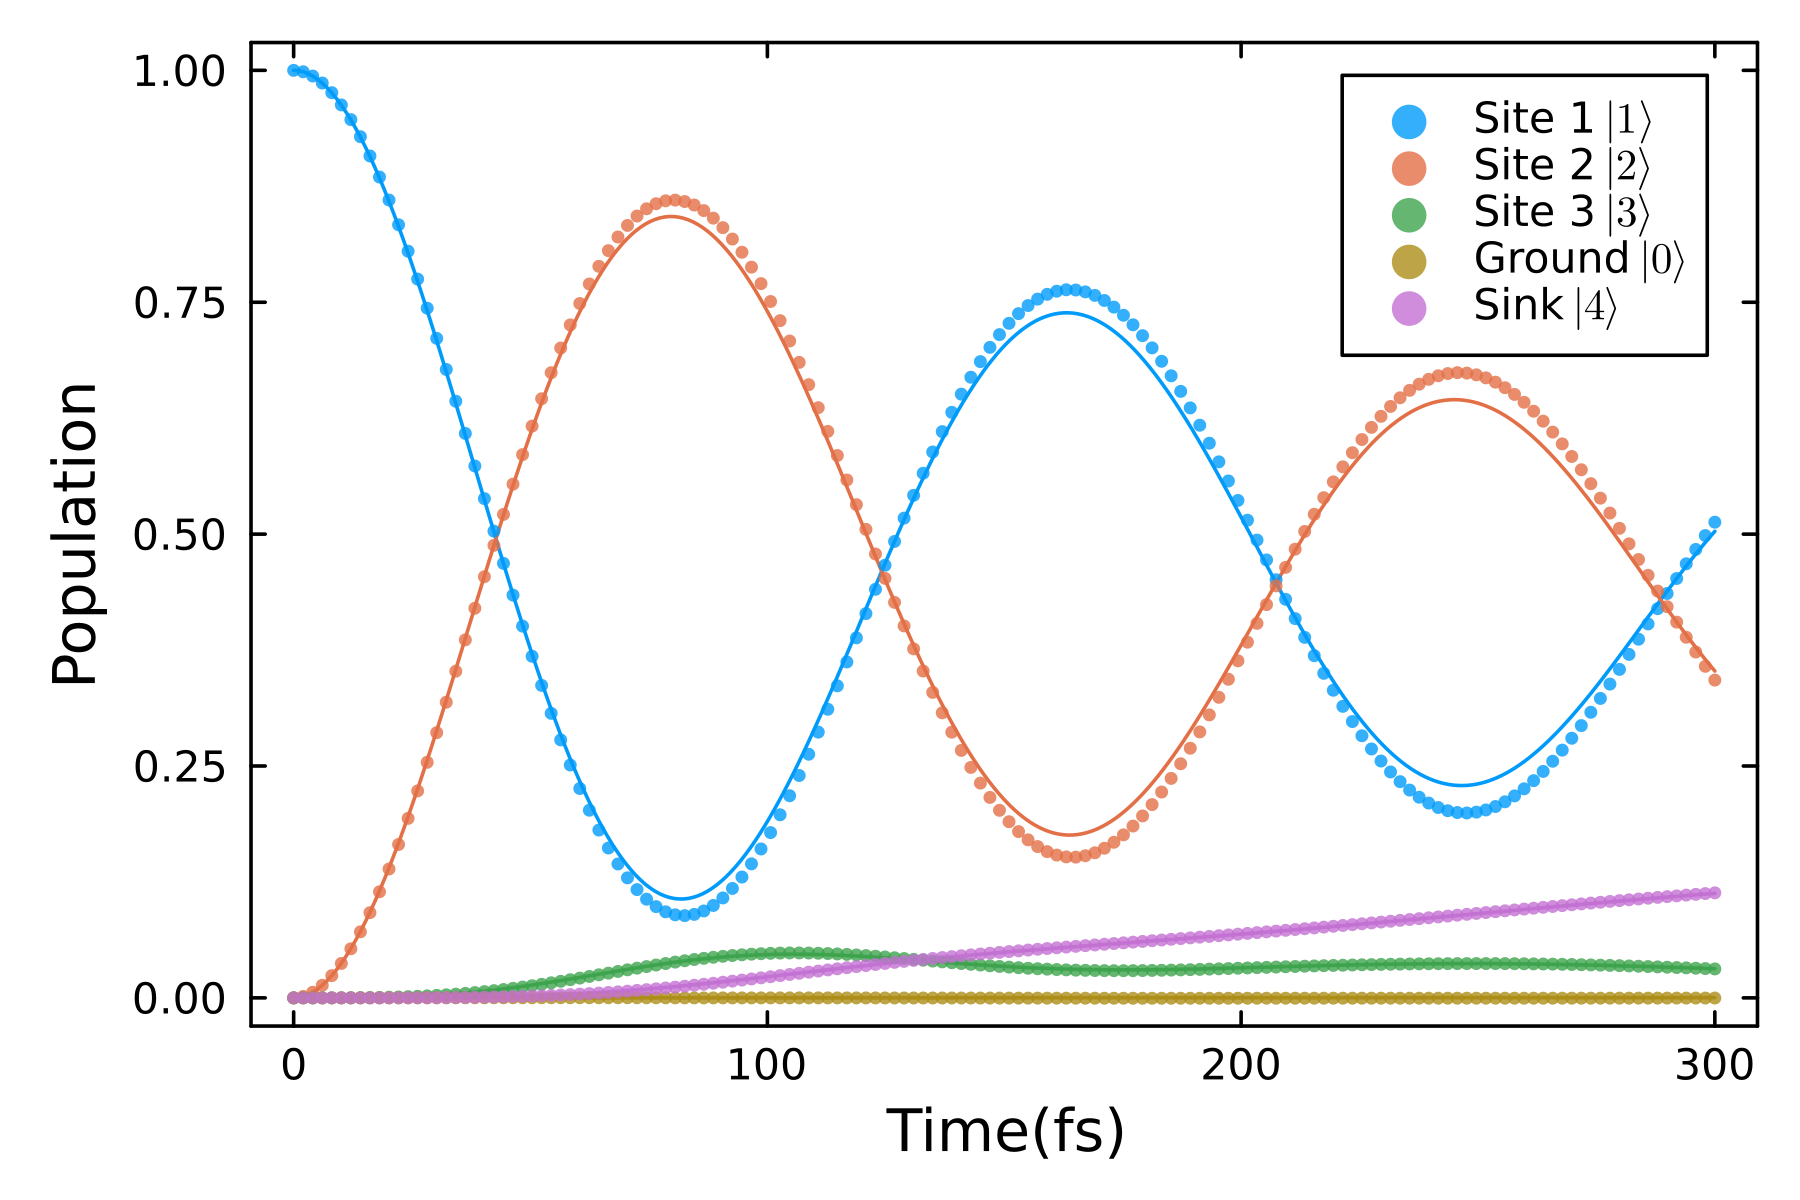

In [9]:
tf=300e-15
dt=1e-15
# tf=450
# dt=10
u0=zeros(ComplexF64,5,5)
u0[2,2]=1
He = Hamiltonian([(s) -> 1.0], [H], unit=:ħ)
# He.size
# l=l1+l2+l3+l4+l5+l6+l7

ops=[l1,l2,l3,l4,l5,l6,l7]

gamma=1
linds=[Lindblad(gamma, o) for o in ops]
# print(typeof(linds))
linds=InteractionSet(linds...)
annealing =  Annealing(He, u0, interactions=linds)
sol = solve_lindblad(annealing, tf, alg=Tsit5(), abstol=1e-6, reltol=1e-6, saveat=0:dt:tf)
steps=300 #Integer(tf/dt)
# real(sol.u[30][7])
zero_e=[real(sol.u[i][1]) for i in 1:steps]
excited_e=[real(sol.u[i][7]) for i in 1:steps]
ground_e=[real(sol.u[i][13]) for i in 1:steps]
one_e=[real(sol.u[i][19]) for i in 1:steps]
two_e=[real(sol.u[i][25]) for i in 1:steps]
times = LinRange(0, 300, steps)

plot(times, excited_e, legend=:topright,label=false, xlabel="Time(fs)", color=[1], ylabel="Population", linewidth=1, grid=false, thickness_scaling=1.2, framestyle=:box)
# plot!(legend=:outerbottom, legendcolumns=2)
plot!(times, ground_e, label=false )
plot!(times, one_e, label=false)
plot!(times, two_e, label=false)
plot!(times, zero_e, label=false)

times = LinRange(0, 300, 150)
# for t in times:
one=load("fmo_vectorized.jld2", "one")
two = load("fmo_vectorized.jld2", "two")
zero = load("fmo_vectorized.jld2", "zero")
ground = load("fmo_vectorized.jld2", "ground")
excited = load("fmo_vectorized.jld2", "excited")
# end
print(typeof(excited))
# Get alternate points
one= one[1:2:end]
two = two[1:2:end]
zero= zero[1:2:end]
ground = ground[1:2:end]
excited = excited[1:2:end]

plot!(dpi=300)
plot!(times, excited, label=L"Site 1 $|1⟩$", seriestype=:scatter, mc=[1], ms=2, markershape=:circle, markerstrokewidth=0.0, ma=0.8)
plot!(times, ground, label=L"Site 2 $|2⟩$", seriestype=:scatter, mc=[2], ms=2, markershape=:circle, markerstrokewidth=0.0, ma=0.8)
plot!(times, one, label=L"Site 3 $|3⟩$", seriestype=:scatter, mc=[3], ms=2, markershape=:circle, markerstrokewidth=0.0, ma=0.8)
plot!(times, zero, label=L"Ground $|0⟩$", seriestype=:scatter, mc=[5], ms=2, markershape=:circle, markerstrokewidth=0.0, ma=0.8)
plot!(times, two, label=L"Sink $|4⟩$", seriestype=:scatter, mc=[4], ms=2, markershape=:circle, markerstrokewidth=0.0, ma=0.8)  


# savefig("fmo_complex.pdf")

## FMO:Vectorized

In [2]:
# Create a 5x5 matrix of zeros
n=8
H = zeros(ComplexF64,n, n)

# Modify specific elements
H[2, 2] = 0.0267
H[2, 3] = -0.0129
H[2, 4] = 0.000632
H[3, 2] = -0.0129
H[3, 3] = 0.0273
H[3, 4] = 0.00404
H[4, 2] = 0.000632
H[4, 3] = 0.00404
H[4, 4] = 0

H=(2*π*H/4.135e-15)

# # Display the resulting matrix
# println(H)
α=2*3e12
β=2*5e8
γ=2*6.28e12

# α=2*3e-3 #* 1e15
# β=0 #2*5e-7 #*1e15
# γ=0 #2*6.28e-3 #*1e15
# σ=sqrt(α)
l1=zeros(ComplexF64,n,n)
l1[2,2]=sqrt(α)
l1op = [AVQD.TagOperator(l1, "1", 6)]

l2=zeros(ComplexF64,n,n)
l2[3,3]=sqrt(α)
l2op = [AVQD.TagOperator(l2, "2", 6)]

l3=zeros(ComplexF64,n,n)
l3[4,4]=sqrt(α)
l3op = [AVQD.TagOperator(l3, "3", 6)]

l4=zeros(ComplexF64,n,n)
l4[1,2]=sqrt(β)
l4op = [AVQD.TagOperator(l4, "4", 6)]

l5=zeros(ComplexF64,n,n)
l5[1,3]=sqrt(β)
l5op = [AVQD.TagOperator(l5, "5", 6)]

l6=zeros(ComplexF64,n,n)
l6[1,4]=sqrt(β)
l6op = [AVQD.TagOperator(l6, "6", 6)]

l7=zeros(ComplexF64,n,n)
l7[5,4]=sqrt(γ)
l7op = [AVQD.TagOperator(l7, "7", 6)]
# l7_array=l7[:]

1-element Vector{AVQD.TagOperator}:
 AVQD.TagOperator(ComplexF64[0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; … ; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im], "7", 6)

In [3]:
function hereone_step!(A::Ansatz{true}, He, Ha, dt,t)
    relrcut = A.relrcut
    ψ = A |> AVQD.get_state
    dψ = AVQD.partial_theta(A)
    M = AVQD.build_m(ψ, dψ)
    V = AVQD.build_v(ψ, dψ, He, Ha)
    # print("\n M:",M)
    # print("\n V:",V)


    dθ, vmv = AVQD.lin_solve(M, V)
    # print("\n dθ:",dθ)
    # print("\n vmv:",vmv)
    #vmv = V' * inverse(M) * V
    #bound = 2 * real(ψ' * Ha * Ha * ψ + (ψ' * Ha * ψ)^2) #
    #cross = 2 * imag(ψ' * (He * Ha - Ha * He) * ψ)
    #varHe = 2 * real(ψ' * He * He * ψ - (ψ' * He * ψ)^2)

    vmvMax = vmv
    Mtmp = M
    Vtmp = V
    dθtmp = dθ
    opTmp = nothing
    dψₐTmp = nothing

    add_flag = true

    while add_flag
        tagTmp = nothing
        for op in A.pool
            if (AVQD.get_newest_A(A) |> AVQD.tag) == AVQD.tag(op)
                continue
            end
            dψₐ = -0.5im * AVQD.lmul(op, ψ)
            Mop = AVQD.update_m(M, dψₐ, ψ, dψ)
            Vop = AVQD.update_v(V, dψₐ, ψ, He, Ha)
            dθop, vmvOp = AVQD.lin_solve(Mop, Vop)
            # print(vmvOp, vmvMax)        # saurabh
            # print("\n inside 'of' for OP")

            #vmvOp = Vop' * inverse(Mop) * Vop
            if vmvOp > vmvMax
                # adding op decrease the distance
                # print("\n inside 'if' of 'of' for OP")
                Mtmp = Mop
                Vtmp = Vop
                vmvMax = vmvOp
                dθtmp = dθop
                opTmp = op
                tagTmp = AVQD.tag(op)
                dψₐTmp = dψₐ
            end
        end
        print("\n diff:",vmvMax - vmv)
        print("\n time: \t",t)
        print("\n relrcut:",relrcut)      
        add_flag = vmvMax - vmv < relrcut ? false : true
        if tagTmp !== nothing && add_flag
            #@info "Add operator to ansatz" tagTmp
            # print("\n tagTMP:",tagTmp)
            # print("\n add_flag",add_flag)
            # print("\n inside adding op")

            AVQD.add_A!(A, opTmp)
            vmv = vmvMax

            #@show varHe - vmv + bound + cross
            M = Mtmp
            V = Vtmp
            dθ = dθtmp
            push!(dψ, dψₐTmp)
        end
    end
    #dθ = inverse(M) * V
    AVQD.update_θ!(A, dθ, dt)
    AVQD.update_state!(A)
end

hereone_step! (generic function with 1 method)

In [14]:
# function heresolve_avq(H::VectorizedEffectiveHamiltonian, A::Ansatz, tspan, dt::Number)
#     # store inital ref state for reinitializtion
#     ref_init = A |> AVQD.get_ref
#     nqbit = A.nqbit
#     # reset current state
#     AVQD.update_state!(A)
#     # initial time
#     t = tspan[1]
#     # results recorder
#     t_list = []
#     u_list = []
#     θ_list = []
#     A_list = []
# 	norm_list = []
#     push!(t_list, t)
#     push!(u_list, reshape(A |> AVQD.get_state, 2^nqbit, 2^nqbit))
#     push!(θ_list, A.θ |> copy)
#     push!(A_list, [i |> AVQD.tag for i in A.A])
# 	push!(norm_list, 1.0)
#     Γ = 0                  
#     t_idx = 2
#     print("\n here1")
#     while t + dt <= tspan[2]
#         print("\n here2: \t",t)
#         @debug "Solving for t:" t
#         He = AVQD.herm(H, t)
#         Ha = AVQD.antiherm(H)
#         @debug "Current ansats:" [i |> AVQD.tag for i in A.A]
        
#         hereone_step!(A, He, Ha, dt,t)
#         print("\n here3")
#         ψ = A |> AVQD.get_state
# 		Γ = Γ + 2 * real(ψ' * Ha * ψ) * dt
#         ρ = reshape(ψ, 2^nqbit, 2^nqbit)
#         # renormalize density matrix
#         ρ = ρ / tr(ρ)

#         t_idx += 1
#         t += dt
#         push!(t_list, t)
#         push!(u_list, ρ)
#         push!(θ_list, A.θ |> copy)
#         push!(A_list, [i |> AVQD.tag for i in A.A])
# 		# record the norm shrinking
# 		push!(norm_list, exp(-Γ))
#     end
#     print("\n Length of Final ansats:", length([i |> AVQD.tag for i in A.A]))

#     print("\n Final ansats:", [i |> AVQD.tag for i in A.A])
#     # reset ansatz to the inital condition
#     AVQD.set_ref!(A, ref_init)
#     AVQD.reset!(A)
#     AVQD.AVQDSol(t_list, u_list, θ_list, A_list, [], [], norm = norm_list)
# end


heresolve_avq (generic function with 1 method)

In [4]:
using DataFrames

function heresolve_avq(H::VectorizedEffectiveHamiltonian, A::Ansatz, tspan, dt::Number, output_file::AbstractString)
    # store inital ref state for reinitializtion
    ref_init = A |> AVQD.get_ref

    nqbit = A.nqbit
    AVQD.update_state!(A)
    t = tspan[1]
    t_list = []
    u_list = []
    θ_list = []
    A_list = []
    norm_list = []
    push!(t_list, t)
    push!(u_list, reshape(A |> AVQD.get_state, 2^nqbit, 2^nqbit))
    push!(θ_list, A.θ |> copy)
    push!(A_list, [i |> AVQD.tag for i in A.A])
    push!(norm_list, 1.0)
    Γ = 0
    t_idx = 2
    while t + dt <= tspan[2]
        He = AVQD.herm(H, t)
        Ha = AVQD.antiherm(H)
        hereone_step!(A, He, Ha, dt, t)
        ψ = A |> AVQD.get_state
        Γ = Γ + 2 * real(ψ' * Ha * ψ) * dt
        ρ = reshape(ψ, 2^nqbit, 2^nqbit)
        ρ = ρ / tr(ρ)

        t_idx += 1
        t += dt
        push!(t_list, t)
        push!(u_list, ρ)
        push!(θ_list, A.θ |> copy)
        push!(A_list, [i |> AVQD.tag for i in A.A])
        push!(norm_list, exp(-Γ))
    end

    # Write the data to a CSV file
    csv_data = Dict("t" => t_list, "u" => u_list, "θ" => θ_list, "A" => A_list, "norm" => norm_list)
    CSV.write(output_file, DataFrame(csv_data))

    # Reset ansatz to the initial condition
    AVQD.set_ref!(A, ref_init)
    AVQD.reset!(A)
    AVQD.AVQDSol(t_list, u_list, θ_list, A_list, [], [], norm=norm_list)
end


heresolve_avq (generic function with 1 method)

In [5]:
tf=300e-15
dt=1e-15
# linds=[l1op,l2op,l3op,l4op,l5op,l6op,l7op]
linds=[l1op,l2op,l3op,l4op,l5op,l6op,l7op]
# gamma=[0,0,0]#,0,0,0,0]
gamma=[1,1,1,1,1,1,1]
Hv = VectorizedEffectiveHamiltonian([(t) -> 1.0], [H], gamma, linds)
# # Hv_padded = vcat(Hv, zeros(7, 25))
# # Hv_padded = hcat(Hv_padded, zeros(32, 7))
# # println(Hv)
# # u0=[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] |> normalize
# # u0 = ones(ComplexF64, 2^5) |> normalize
u0=[0,1,0,0,0,0,0,0] |> normalize
# typeof(u0)
# # println(length(u0))
# # u0=zeros(1,32)
# # u0[1,1]=1
# # print(u0)
ansatz = Ansatz(u0, relrcut=1e-3 , vectorize=true, pool="all2")
# # get_state(A::Ansatz) = A.state


# # ψ = ansatz |> get_state
# # println(ansatz.partial_theta)
# # println(length(A.A))
# # println(ansatz)
# # println()
sol2 = heresolve_avq(Hv, ansatz, [0, tf], dt,"FMO_complex.csv")



 diff:2.473901162496e12
 time: 	6.400000000000002e-14
 relrcut:0.001


 diff:2.74877906944e11
 time: 	6.400000000000002e-14
 relrcut:0.001


 diff:0.0
 time: 	6.400000000000002e-14
 relrcut:0.001


 diff:1.649267441664e12
 time: 	6.500000000000001e-14
 relrcut:0.001


 diff:2.74877906944e11
 time: 	6.500000000000001e-14
 relrcut:0.001


 diff:0.0
 time: 	6.500000000000001e-14
 relrcut:0.001


 diff:1.099511627776e12
 time: 	6.600000000000001e-14
 relrcut:0.001


 diff:5.49755813888e11
 time: 	6.600000000000001e-14
 relrcut:0.001


 diff:0.0
 time: 	6.600000000000001e-14
 relrcut:0.001


 diff:5.49755813888e11
 time: 	6.7e-14
 relrcut:0.001


 diff:0.0
 time: 	6.7e-14
 relrcut:0.001


 diff:8.24633720832e11
 time: 	6.8e-14
 relrcut:0.001


 diff:2.74877906944e11
 time: 	6.8e-14
 relrcut:0.001


 diff:5.49755813888e11
 time: 	6.8e-14
 relrcut:0.001


 diff:0.0
 time: 	6.8e-14
 relrcut:0.001


 diff:2.473901162496e12
 time: 	6.9e-14
 relrcut:0.001


 diff:2.74877906944e11
 time: 	6.9e-14
 relrcut:0.001


 diff:0.0
 time: 	6.9e-14
 relrcut:0.001


 diff:2.199023255552e12
 time: 	6.999999999999999e-14
 relrcut:0.001


 diff:1.37438953472e12
 time: 	6.999999999999999e-14
 relrcut:0.001


 diff:0.0
 time: 	6.999999999999999e-14
 relrcut:

0.001
 diff:1.924145348608e12
 time: 	7.099999999999999e-14
 relrcut:0.001


 diff:2.74877906944e11
 time: 	7.099999999999999e-14
 relrcut:0.001


 diff:0.0
 time: 	7.099999999999999e-14
 relrcut:

0.001
 diff:1.099511627776e12
 time: 	7.199999999999998e-14
 relrcut:0.001


 diff:0.0
 time: 	7.199999999999998e-14
 relrcut:0.001


 diff:2.473901162496e12
 time: 	7.299999999999998e-14
 relrcut:0.001


 diff:0.0
 time: 	7.299999999999998e-14
 relrcut:0.001


 diff:0.0
 time: 	7.399999999999997e-14
 relrcut:0.001


 diff:4.672924418048e12
 time: 	7.499999999999997e-14
 relrcut:0.001


 diff:1.37438953472e12
 time: 	7.499999999999997e-14
 relrcut:0.001


 diff:5.49755813888e11
 time: 	7.499999999999997e-14
 relrcut:0.001


 diff:1.099511627776e12
 time: 	7.499999999999997e-14
 relrcut:0.001


 diff:5.49755813888e11
 time: 	7.499999999999997e-14
 relrcut:0.001


 diff:0.0
 time: 	7.499999999999997e-14
 relrcut:0.001


 diff:8.24633720832e11
 time: 	7.599999999999997e-14
 relrcut:0.001


 diff:2.74877906944e11
 time: 	7.599999999999997e-14
 relrcut:0.001


 diff:2.74877906944e11
 time: 	7.599999999999997e-14
 relrcut:0.001


 diff:2.74877906944e11
 time: 	7.599999999999997e-14
 relrcut:0.001


 diff:5.49755813888e11
 time: 	7.599999999999997e-14
 relrcut:0.001


 diff:0.0
 time: 	7.599999999999997e-14
 relrcut:0.001


 diff:2.74877906944e12
 time: 	7.699999999999996e-14
 relrcut:0.001


 diff:0.0
 time: 	7.699999999999996e-14
 relrcut:0.001


 diff:1.924145348608e12
 time: 	7.799999999999996e-14
 relrcut:0.001


 diff:0.0
 time: 	7.799999999999996e-14
 relrcut:

0.001
 diff:1.649267441664e12
 time: 	7.899999999999995e-14
 relrcut:0.001


 diff:8.24633720832e11
 time: 	7.899999999999995e-14
 relrcut:0.001


 diff:8.24633720832e11
 time: 	7.899999999999995e-14
 relrcut:0.001


 diff:2.74877906944e11
 time: 	7.899999999999995e-14
 relrcut:0.001


 diff:0.0
 time: 	7.899999999999995e-14
 relrcut:0.001


 diff:1.924145348608e12
 time: 	7.999999999999995e-14
 relrcut:0.001


 diff:6.8719476736e11
 time: 	7.999999999999995e-14
 relrcut:0.001


 diff:9.62072674304e11
 time: 	7.999999999999995e-14
 relrcut:0.001


 diff:2.74877906944e11
 time: 	7.999999999999995e-14
 relrcut:0.001


 diff:2.74877906944e11
 time: 	7.999999999999995e-14
 relrcut:0.001


 diff:5.49755813888e11
 time: 	7.999999999999995e-14
 relrcut:0.001


 diff:0.0
 time: 	7.999999999999995e-14
 relrcut:0.001


 diff:1.236950581248e12
 time: 	8.099999999999995e-14
 relrcut:0.001


 diff:0.0
 time: 	8.099999999999995e-14
 relrcut:0.001


 diff:8.24633720832e11
 time: 	8.199999999999994e-14
 relrcut:0.001


 diff:1.37438953472e11
 time: 	8.199999999999994e-14
 relrcut:0.001


 diff:4.12316860416e11
 time: 	8.199999999999994e-14
 relrcut:0.001


 diff:1.37438953472e11
 time: 	8.199999999999994e-14
 relrcut:0.001


 diff:1.37438953472e11
 time: 	8.199999999999994e-14
 relrcut:

0.001
 diff:0.0
 time: 	8.199999999999994e-14
 relrcut:0.001


 diff:2.06158430208e12
 time: 	8.299999999999994e-14
 relrcut:0.001


 diff:2.74877906944e11
 time: 	8.299999999999994e-14
 relrcut:0.001


 diff:1.37438953472e11
 time: 	8.299999999999994e-14
 relrcut:0.001


 diff:0.0
 time: 	8.299999999999994e-14
 relrcut:0.001


 diff:2.74877906944e12
 time: 	8.399999999999993e-14
 relrcut:0.001


 diff:0.0
 time: 	8.399999999999993e-14
 relrcut:0.001


 diff:4.672924418048e12
 time: 	8.499999999999993e-14
 relrcut:0.001


 diff:2.74877906944e11
 time: 	8.499999999999993e-14
 relrcut:0.001


 diff:0.0
 time: 	8.499999999999993e-14
 relrcut:0.001


 diff:9.62072674304e11
 time: 	8.599999999999992e-14
 relrcut:

0.001
 diff:0.0
 time: 	8.599999999999992e-14
 relrcut:0.001


 diff:1.37438953472e11
 time: 	8.699999999999992e-14
 relrcut:0.001


 diff:1.37438953472e11
 time: 	8.699999999999992e-14
 relrcut:0.001


 diff:0.0
 time: 	8.699999999999992e-14
 relrcut:0.001


 diff:9.62072674304e11
 time: 	8.799999999999992e-14
 relrcut:0.001


 diff:1.37438953472e11
 time: 	8.799999999999992e-14
 relrcut:0.001


 diff:0.0
 time: 	8.799999999999992e-14
 relrcut:0.001


 diff:1.236950581248e12
 time: 	8.899999999999991e-14
 relrcut:0.001


 diff:0.0
 time: 	8.899999999999991e-14
 relrcut:0.001


 diff:1.511828488192e12
 time: 	8.999999999999991e-14
 relrcut:0.001


 diff:2.74877906944e11
 time: 	8.999999999999991e-14
 relrcut:0.001


 diff:0.0
 time: 	8.999999999999991e-14
 relrcut:0.001


 diff:9.62072674304e11
 time: 	9.09999999999999e-14
 relrcut:0.001


 diff:1.37438953472e11
 time: 	9.09999999999999e-14
 relrcut:0.001


 diff:0.0
 time: 	9.09999999999999e-14
 relrcut:0.001


 diff:6.8719476736e11
 time: 	9.19999999999999e-14
 relrcut:0.001


 diff:0.0
 time: 	9.19999999999999e-14
 relrcut:0.001


 diff:1.099511627776e12
 time: 	9.29999999999999e-14
 relrcut:0.001


 diff:0.0
 time: 	9.29999999999999e-14
 relrcut:0.001


 diff:1.37438953472e12
 time: 	9.399999999999989e-14
 relrcut:0.001


 diff:4.12316860416e11
 time: 	9.399999999999989e-14
 relrcut:0.001


 diff:0.0
 time: 	9.399999999999989e-14
 relrcut:0.001


 diff:9.62072674304e11
 time: 	9.499999999999989e-14
 relrcut:0.001


 diff:0.0
 time: 	9.499999999999989e-14
 relrcut:0.001


 diff:6.8719476736e11
 time: 	9.599999999999988e-14
 relrcut:0.001


 diff:0.0
 time: 	9.599999999999988e-14
 relrcut:0.001


 diff:5.49755813888e11
 time: 	9.699999999999988e-14
 relrcut:0.001


 diff:1.37438953472e11
 time: 	9.699999999999988e-14
 relrcut:0.001


 diff:0.0
 time: 	9.699999999999988e-14
 relrcut:0.001


 diff:5.49755813888e11
 time: 	9.799999999999987e-14
 relrcut:0.001


 diff:0.0
 time: 	9.799999999999987e-14
 relrcut:0.001


 diff:4.12316860416e11
 time: 	9.899999999999987e-14
 relrcut:0.001


 diff:2.74877906944e11
 time: 	9.899999999999987e-14
 relrcut:0.001


 diff:0.0
 time: 	9.899999999999987e-14
 relrcut:

0.001
 diff:5.49755813888e11
 time: 	9.999999999999986e-14
 relrcut:0.001


 diff:0.0
 time: 	9.999999999999986e-14
 relrcut:0.001


 diff:5.49755813888e11
 time: 	1.0099999999999986e-13
 relrcut:0.001


 diff:0.0
 time: 	1.0099999999999986e-13
 relrcut:0.001


 diff:5.49755813888e11
 time: 	1.0199999999999986e-13
 relrcut:0.001


 diff:0.0
 time: 	1.0199999999999986e-13
 relrcut:0.001


 diff:8.24633720832e11
 time: 	1.0299999999999985e-13
 relrcut:0.001


 diff:2.74877906944e11
 time: 	1.0299999999999985e-13
 relrcut:0.001


 diff:0.0
 time: 	1.0299999999999985e-13
 relrcut:0.001


 diff:9.62072674304e11
 time: 	1.0399999999999985e-13
 relrcut:0.001


 diff:0.0
 time: 	1.0399999999999985e-13
 relrcut:0.001


 diff:1.236950581248e12
 time: 	1.0499999999999984e-13
 relrcut:

0.001
 diff:0.0
 time: 	1.0499999999999984e-13
 relrcut:0.001


 diff:1.236950581248e12
 time: 	1.0599999999999984e-13
 relrcut:0.001


 diff:2.74877906944e11
 time: 	1.0599999999999984e-13
 relrcut:0.001


 diff:0.0
 time: 	1.0599999999999984e-13
 relrcut:0.001


 diff:8.24633720832e11
 time: 	1.0699999999999983e-13
 relrcut:0.001


 diff:0.0
 time: 	1.0699999999999983e-13
 relrcut:0.001


 diff:8.24633720832e11
 time: 	1.0799999999999983e-13
 relrcut:0.001


 diff:0.0
 time: 	1.0799999999999983e-13
 relrcut:0.001


 diff:8.24633720832e11
 time: 	1.0899999999999983e-13
 relrcut:0.001


 diff:0.0
 time: 	1.0899999999999983e-13
 relrcut:0.001


 diff:6.8719476736e11
 time: 	1.0999999999999982e-13
 relrcut:0.001


 diff:0.0
 time: 	1.0999999999999982e-13
 relrcut:0.001


 diff:5.49755813888e11
 time: 	1.1099999999999982e-13
 relrcut:0.001


 diff:0.0
 time: 	1.1099999999999982e-13
 relrcut:0.001


 diff:9.62072674304e11
 time: 	1.1199999999999981e-13
 relrcut:0.001


 diff:0.0
 time: 	1.1199999999999981e-13
 relrcut:0.001


 diff:1.099511627776e12
 time: 	1.1299999999999981e-13
 relrcut:0.001


 diff:0.0
 time: 	1.1299999999999981e-13
 relrcut:0.001


 diff:9.62072674304e11
 time: 	1.1399999999999982e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.1399999999999982e-13
 relrcut:0.001


 diff:0.0
 time: 	1.1399999999999982e-13
 relrcut:0.001


 diff:8.24633720832e11
 time: 	1.1499999999999981e-13
 relrcut:0.001


 diff:2.74877906944e11
 time: 	1.1499999999999981e-13
 relrcut:0.001


 diff:0.0
 time: 	1.1499999999999981e-13
 relrcut:0.001


 diff:5.49755813888e11
 time: 	1.159999999999998e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.159999999999998e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.159999999999998e-13
 relrcut:0.001


 diff:0.0
 time: 	1.159999999999998e-13
 relrcut:0.001


 diff:9.62072674304e11
 time: 	1.169999999999998e-13
 relrcut:0.001


 diff:2.74877906944e11
 time: 	1.169999999999998e-13
 relrcut:0.001


 diff:0.0
 time: 	1.169999999999998e-13
 relrcut:0.001


 diff:6.8719476736e11
 time: 	1.179999999999998e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.179999999999998e-13
 relrcut:0.001


 diff:0.0
 time: 	1.179999999999998e-13
 relrcut:0.001


 diff:8.24633720832e11
 time: 	1.189999999999998e-13
 relrcut:0.001


 diff:0.0
 time: 	1.189999999999998e-13
 relrcut:0.001


 diff:6.8719476736e11
 time: 	1.199999999999998e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.199999999999998e-13
 relrcut:0.001


 diff:0.0
 time: 	1.199999999999998e-13
 relrcut:0.001


 diff:9.62072674304e11
 time: 	1.2099999999999979e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.2099999999999979e-13
 relrcut:0.001


 diff:0.0
 time: 	1.2099999999999979e-13
 relrcut:0.001


 diff:1.236950581248e12
 time: 	1.2199999999999978e-13
 relrcut:0.001


 diff:0.0
 time: 	1.2199999999999978e-13
 relrcut:0.001


 diff:1.099511627776e12
 time: 	1.2299999999999978e-13
 relrcut:0.001


 diff:0.0
 time: 	1.2299999999999978e-13
 relrcut:

0.001
 diff:1.099511627776e12
 time: 	1.2399999999999977e-13
 relrcut:

0.001
 diff:4.12316860416e11
 time: 	1.2399999999999977e-13
 relrcut:0.001


 diff:0.0
 time: 	1.2399999999999977e-13
 relrcut:0.001


 diff:9.62072674304e11
 time: 	1.2499999999999977e-13
 relrcut:0.001


 diff:0.0
 time: 	1.2499999999999977e-13
 relrcut:0.001


 diff:1.236950581248e12
 time: 	1.2599999999999977e-13
 relrcut:0.001


 diff:0.0
 time: 	1.2599999999999977e-13
 relrcut:

0.001
 diff:1.924145348608e12
 time: 	1.2699999999999976e-13
 relrcut:0.001


 diff:0.0
 time: 	1.2699999999999976e-13
 relrcut:0.001


 diff:8.24633720832e11
 time: 	1.2799999999999976e-13
 relrcut:0.001


 diff:0.0
 time: 	1.2799999999999976e-13
 relrcut:0.001


 diff:1.236950581248e12
 time: 	1.2899999999999975e-13
 relrcut:0.001


 diff:0.0
 time: 	1.2899999999999975e-13
 relrcut:0.001


 diff:5.49755813888e11
 time: 	1.2999999999999975e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.2999999999999975e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.2999999999999975e-13
 relrcut:0.001


 diff:0.0
 time: 	1.2999999999999975e-13
 relrcut:0.001


 diff:1.099511627776e12
 time: 	1.3099999999999974e-13
 relrcut:0.001


 diff:0.0
 time: 	1.3099999999999974e-13
 relrcut:0.001


 diff:8.24633720832e11
 time: 	1.3199999999999974e-13
 relrcut:0.001


 diff:0.0
 time: 	1.3199999999999974e-13
 relrcut:0.001


 diff:1.099511627776e12
 time: 	1.3299999999999974e-13
 relrcut:0.001


 diff:0.0
 time: 	1.3299999999999974e-13
 relrcut:0.001


 diff:8.24633720832e11
 time: 	1.3399999999999973e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.3399999999999973e-13
 relrcut:0.001


 diff:0.0
 time: 	1.3399999999999973e-13
 relrcut:0.001


 diff:9.62072674304e11
 time: 	1.3499999999999973e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.3499999999999973e-13
 relrcut:0.001


 diff:0.0
 time: 	1.3499999999999973e-13
 relrcut:0.001


 diff:9.62072674304e11
 time: 	1.3599999999999972e-13
 relrcut:0.001


 diff:0.0
 time: 	1.3599999999999972e-13
 relrcut:0.001


 diff:6.8719476736e11
 time: 	1.3699999999999972e-13
 relrcut:0.001


 diff:0.0
 time: 	1.3699999999999972e-13
 relrcut:0.001


 diff:1.236950581248e12
 time: 	1.3799999999999971e-13
 relrcut:0.001


 diff:0.0
 time: 	1.3799999999999971e-13
 relrcut:0.001


 diff:9.62072674304e11
 time: 	1.389999999999997e-13
 relrcut:0.001


 diff:0.0
 time: 	1.389999999999997e-13
 relrcut:0.001


 diff:5.49755813888e11
 time: 	1.399999999999997e-13
 relrcut:0.001


 diff:0.0
 time: 	1.399999999999997e-13
 relrcut:0.001


 diff:1.511828488192e12
 time: 	1.409999999999997e-13
 relrcut:

0.001
 diff:0.0
 time: 	1.409999999999997e-13
 relrcut:0.001


 diff:0.0
 time: 	1.419999999999997e-13
 relrcut:0.001


 diff:6.8719476736e11
 time: 	1.429999999999997e-13
 relrcut:

0.001
 diff:0.0
 time: 	1.429999999999997e-13
 relrcut:0.001


 diff:5.49755813888e11
 time: 	1.439999999999997e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.439999999999997e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.439999999999997e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.439999999999997e-13
 relrcut:0.001


 diff:0.0
 time: 	1.439999999999997e-13
 relrcut:0.001


 diff:9.62072674304e11
 time: 	1.4499999999999969e-13
 relrcut:0.001


 diff:0.0
 time: 	1.4499999999999969e-13
 relrcut:0.001


 diff:9.62072674304e11
 time: 	1.4599999999999968e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.4599999999999968e-13
 relrcut:0.001


 diff:0.0
 time: 	1.4599999999999968e-13
 relrcut:0.001


 diff:1.099511627776e12
 time: 	1.4699999999999968e-13
 relrcut:0.001


 diff:0.0
 time: 	1.4699999999999968e-13
 relrcut:0.001


 diff:4.12316860416e11
 time: 	1.4799999999999967e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.4799999999999967e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.4799999999999967e-13
 relrcut:0.001


 diff:0.0
 time: 	1.4799999999999967e-13
 relrcut:0.001


 diff:9.62072674304e11
 time: 	1.4899999999999967e-13
 relrcut:0.001


 diff:0.0
 time: 	1.4899999999999967e-13
 relrcut:0.001


 diff:1.099511627776e12
 time: 	1.4999999999999966e-13
 relrcut:0.001


 diff:2.74877906944e11
 time: 	1.4999999999999966e-13
 relrcut:0.001


 diff:2.74877906944e11
 time: 	1.4999999999999966e-13
 relrcut:0.001


 diff:0.0
 time: 	1.4999999999999966e-13
 relrcut:0.001


 diff:9.62072674304e11
 time: 	1.5099999999999966e-13
 relrcut:0.001


 diff:0.0
 time: 	1.5099999999999966e-13
 relrcut:0.001


 diff:5.49755813888e11
 time: 	1.5199999999999966e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.5199999999999966e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.5199999999999966e-13
 relrcut:0.001


 diff:2.74877906944e11
 time: 	1.5199999999999966e-13
 relrcut:0.001


 diff:0.0
 time: 	1.5199999999999966e-13
 relrcut:0.001


 diff:6.8719476736e11
 time: 	1.5299999999999965e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.5299999999999965e-13
 relrcut:0.001


 diff:0.0
 time: 	1.5299999999999965e-13
 relrcut:0.001


 diff:8.24633720832e11
 time: 	1.5399999999999965e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.5399999999999965e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.5399999999999965e-13
 relrcut:0.001


 diff:0.0
 time: 	1.5399999999999965e-13
 relrcut:0.001


 diff:6.8719476736e11
 time: 	1.5499999999999964e-13
 relrcut:0.001


 diff:0.0
 time: 	1.5499999999999964e-13
 relrcut:0.001


 diff:1.236950581248e12
 time: 	1.5599999999999964e-13
 relrcut:0.001


 diff:0.0
 time: 	1.5599999999999964e-13
 relrcut:0.001


 diff:1.649267441664e12
 time: 	1.5699999999999963e-13
 relrcut:0.001


 diff:0.0
 time: 	1.5699999999999963e-13
 relrcut:0.001


 diff:1.099511627776e12
 time: 	1.5799999999999963e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.5799999999999963e-13
 relrcut:0.001


 diff:2.74877906944e11
 time: 	1.5799999999999963e-13
 relrcut:0.001


 diff:0.0
 time: 	1.5799999999999963e-13
 relrcut:0.001


 diff:6.8719476736e11
 time: 	1.5899999999999963e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.5899999999999963e-13
 relrcut:0.001


 diff:0.0
 time: 	1.5899999999999963e-13
 relrcut:0.001


 diff:8.24633720832e11
 time: 	1.5999999999999962e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.5999999999999962e-13
 relrcut:0.001


 diff:0.0
 time: 	1.5999999999999962e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.6099999999999962e-13
 relrcut:0.001


 diff:2.74877906944e11
 time: 	1.6099999999999962e-13
 relrcut:0.001


 diff:0.0
 time: 	1.6099999999999962e-13
 relrcut:0.001


 diff:6.8719476736e11
 time: 	1.6199999999999961e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.6199999999999961e-13
 relrcut:0.001


 diff:0.0
 time: 	1.6199999999999961e-13
 relrcut:0.001


 diff:9.62072674304e11
 time: 	1.629999999999996e-13
 relrcut:0.001


 diff:0.0
 time: 	1.629999999999996e-13
 relrcut:0.001


 diff:8.24633720832e11
 time: 	1.639999999999996e-13
 relrcut:0.001


 diff:0.0
 time: 	1.639999999999996e-13
 relrcut:0.001


 diff:1.236950581248e12
 time: 	1.649999999999996e-13
 relrcut:0.001


 diff:2.74877906944e11
 time: 	1.649999999999996e-13
 relrcut:0.001


 diff:0.0
 time: 	1.649999999999996e-13
 relrcut:

0.001
 diff:5.49755813888e11
 time: 	1.659999999999996e-13
 relrcut:0.001


 diff:2.74877906944e11
 time: 	1.659999999999996e-13
 relrcut:0.001


 diff:0.0
 time: 	1.659999999999996e-13
 relrcut:0.001


 diff:1.786706395136e12
 time: 	1.669999999999996e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.669999999999996e-13
 relrcut:0.001


 diff:0.0
 time: 	1.669999999999996e-13
 relrcut:0.001


 diff:2.74877906944e11
 time: 	1.6799999999999959e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.6799999999999959e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.6799999999999959e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.6799999999999959e-13
 relrcut:0.001


 diff:0.0
 time: 	1.6799999999999959e-13
 relrcut:0.001


 diff:8.24633720832e11
 time: 	1.6899999999999958e-13
 relrcut:0.001


 diff:2.74877906944e11
 time: 	1.6899999999999958e-13
 relrcut:0.001


 diff:0.0
 time: 	1.6899999999999958e-13
 relrcut:0.001


 diff:5.49755813888e11
 time: 	1.6999999999999958e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.6999999999999958e-13
 relrcut:0.001


 diff:0.0
 time: 	1.6999999999999958e-13
 relrcut:0.001


 diff:2.74877906944e11
 time: 	1.7099999999999957e-13
 relrcut:0.001


 diff:0.0
 time: 	1.7099999999999957e-13
 relrcut:0.001


 diff:6.8719476736e11
 time: 	1.7199999999999957e-13
 relrcut:0.001


 diff:4.12316860416e11
 time: 	1.7199999999999957e-13
 relrcut:

0.001
 diff:0.0
 time: 	1.7199999999999957e-13
 relrcut:0.001


 diff:9.62072674304e11
 time: 	1.7299999999999957e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.7299999999999957e-13
 relrcut:0.001


 diff:0.0
 time: 	1.7299999999999957e-13
 relrcut:

0.001
 diff:6.8719476736e11
 time: 	1.7399999999999956e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.7399999999999956e-13
 relrcut:0.001


 diff:0.0
 time: 	1.7399999999999956e-13
 relrcut:0.001


 diff:9.62072674304e11
 time: 	1.7499999999999956e-13
 relrcut:0.001


 diff:0.0
 time: 	1.7499999999999956e-13
 relrcut:

0.001
 diff:4.12316860416e11
 time: 	1.7599999999999955e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.7599999999999955e-13
 relrcut:0.001


 diff:0.0
 time: 	1.7599999999999955e-13
 relrcut:0.001


 diff:2.74877906944e11
 time: 	1.7699999999999955e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.7699999999999955e-13
 relrcut:0.001


 diff:0.0
 time: 	1.7699999999999955e-13
 relrcut:0.001


 diff:6.8719476736e11
 time: 	1.7799999999999954e-13
 relrcut:

0.001
 diff:1.37438953472e11
 time: 	1.7799999999999954e-13
 relrcut:0.001


 diff:0.0
 time: 	1.7799999999999954e-13
 relrcut:

0.001
 diff:2.74877906944e11
 time: 	1.7899999999999954e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.7899999999999954e-13
 relrcut:0.001


 diff:2.74877906944e11
 time: 	1.7899999999999954e-13
 relrcut:0.001


 diff:0.0
 time: 	1.7899999999999954e-13
 relrcut:0.001


 diff:5.49755813888e11
 time: 	1.7999999999999954e-13
 relrcut:0.001


 diff:0.0
 time: 	1.7999999999999954e-13
 relrcut:0.001


 diff:1.37438953472e12
 time: 	1.8099999999999953e-13
 relrcut:0.001


 diff:0.0
 time: 	1.8099999999999953e-13
 relrcut:0.001


 diff:6.8719476736e11
 time: 	1.8199999999999953e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.8199999999999953e-13
 relrcut:0.001


 diff:0.0
 time: 	1.8199999999999953e-13
 relrcut:0.001


 diff:1.511828488192e12
 time: 	1.8299999999999952e-13
 relrcut:0.001


 diff:0.0
 time: 	1.8299999999999952e-13
 relrcut:0.001


 diff:6.8719476736e11
 time: 	1.8399999999999952e-13
 relrcut:0.001


 diff:0.0
 time: 	1.8399999999999952e-13
 relrcut:0.001


 diff:9.62072674304e11
 time: 	1.8499999999999951e-13
 relrcut:0.001


 diff:0.0
 time: 	1.8499999999999951e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.859999999999995e-13
 relrcut:0.001


 diff:0.0
 time: 	1.859999999999995e-13
 relrcut:0.001


 diff:5.49755813888e11
 time: 	1.869999999999995e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.869999999999995e-13
 relrcut:0.001


 diff:0.0
 time: 	1.869999999999995e-13
 relrcut:0.001


 diff:8.24633720832e11
 time: 	1.879999999999995e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.879999999999995e-13
 relrcut:0.001


 diff:0.0
 time: 	1.879999999999995e-13
 relrcut:

0.001
 diff:8.24633720832e11
 time: 	1.889999999999995e-13
 relrcut:0.001


 diff:0.0
 time: 	1.889999999999995e-13
 relrcut:0.001


 diff:6.8719476736e11
 time: 	1.899999999999995e-13
 relrcut:0.001


 diff:2.74877906944e11
 time: 	1.899999999999995e-13
 relrcut:0.001


 diff:0.0
 time: 	1.899999999999995e-13
 relrcut:0.001


 diff:5.49755813888e11
 time: 	1.909999999999995e-13
 relrcut:0.001


 diff:0.0
 time: 	1.909999999999995e-13
 relrcut:

0.001
 diff:1.099511627776e12
 time: 	1.9199999999999948e-13
 relrcut:0.001


 diff:0.0
 time: 	1.9199999999999948e-13
 relrcut:0.001


 diff:5.49755813888e11
 time: 	1.9299999999999948e-13
 relrcut:0.001


 diff:0.0
 time: 	1.9299999999999948e-13
 relrcut:0.001


 diff:9.62072674304e11
 time: 	1.9399999999999948e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.9399999999999948e-13
 relrcut:0.001


 diff:0.0
 time: 	1.9399999999999948e-13
 relrcut:0.001


 diff:8.24633720832e11
 time: 	1.9499999999999947e-13
 relrcut:0.001


 diff:0.0
 time: 	1.9499999999999947e-13
 relrcut:0.001


 diff:1.236950581248e12
 time: 	1.9599999999999947e-13
 relrcut:0.001


 diff:2.74877906944e11
 time: 	1.9599999999999947e-13
 relrcut:0.001


 diff:0.0
 time: 	1.9599999999999947e-13
 relrcut:0.001


 diff:8.24633720832e11
 time: 	1.9699999999999946e-13
 relrcut:0.001


 diff:0.0
 time: 	1.9699999999999946e-13
 relrcut:0.001


 diff:9.62072674304e11
 time: 	1.9799999999999946e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	1.9799999999999946e-13
 relrcut:0.001


 diff:0.0
 time: 	1.9799999999999946e-13
 relrcut:0.001


 diff:5.49755813888e11
 time: 	1.9899999999999945e-13
 relrcut:0.001


 diff:0.0
 time: 	1.9899999999999945e-13
 relrcut:0.001


 diff:6.8719476736e11
 time: 	1.9999999999999945e-13
 relrcut:0.001


 diff:2.74877906944e11
 time: 	1.9999999999999945e-13
 relrcut:0.001


 diff:0.0
 time: 	1.9999999999999945e-13
 relrcut:0.001


 diff:1.236950581248e12
 time: 	2.0099999999999945e-13
 relrcut:0.001


 diff:0.0
 time: 	2.0099999999999945e-13
 relrcut:0.001


 diff:1.099511627776e12
 time: 	2.0199999999999944e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	2.0199999999999944e-13
 relrcut:0.001


 diff:0.0
 time: 	2.0199999999999944e-13
 relrcut:0.001


 diff:1.099511627776e12
 time: 	2.0299999999999944e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	2.0299999999999944e-13
 relrcut:0.001


 diff:0.0
 time: 	2.0299999999999944e-13
 relrcut:0.001


 diff:8.24633720832e11
 time: 	2.0399999999999943e-13
 relrcut:

0.001
 diff:1.37438953472e11
 time: 	2.0399999999999943e-13
 relrcut:0.001


 diff:0.0
 time: 	2.0399999999999943e-13
 relrcut:

0.001
 diff:1.511828488192e12
 time: 	2.0499999999999943e-13
 relrcut:0.001


 diff:0.0
 time: 	2.0499999999999943e-13
 relrcut:0.001


 diff:0.0
 time: 	2.0599999999999943e-13
 relrcut:0.001


 diff:8.24633720832e11
 time: 	2.0699999999999942e-13
 relrcut:0.001


 diff:0.0
 time: 	2.0699999999999942e-13
 relrcut:0.001


 diff:5.49755813888e11
 time: 	2.0799999999999942e-13
 relrcut:0.001


 diff:0.0
 time: 	2.0799999999999942e-13
 relrcut:0.001


 diff:8.24633720832e11
 time: 	2.089999999999994e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	2.089999999999994e-13
 relrcut:0.001


 diff:0.0
 time: 	2.089999999999994e-13
 relrcut:0.001


 diff:5.49755813888e11
 time: 	2.099999999999994e-13
 relrcut:0.001


 diff:2.74877906944e11
 time: 	2.099999999999994e-13
 relrcut:0.001


 diff:0.0
 time: 	2.099999999999994e-13
 relrcut:0.001


 diff:8.24633720832e11
 time: 	2.109999999999994e-13
 relrcut:0.001


 diff:0.0
 time: 	2.109999999999994e-13
 relrcut:0.001


 diff:4.12316860416e11
 time: 	2.119999999999994e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	2.119999999999994e-13
 relrcut:0.001


 diff:0.0
 time: 	2.119999999999994e-13
 relrcut:0.001


 diff:6.8719476736e11
 time: 	2.129999999999994e-13
 relrcut:0.001


 diff:2.74877906944e11
 time: 	2.129999999999994e-13
 relrcut:0.001


 diff:0.0
 time: 	2.129999999999994e-13
 relrcut:0.001


 diff:6.8719476736e11
 time: 	2.139999999999994e-13
 relrcut:0.001


 diff:0.0
 time: 	2.139999999999994e-13
 relrcut:0.001


 diff:8.24633720832e11
 time: 	2.1499999999999939e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	2.1499999999999939e-13
 relrcut:0.001


 diff:0.0
 time: 	2.1499999999999939e-13
 relrcut:0.001


 diff:8.24633720832e11
 time: 	2.1599999999999938e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	2.1599999999999938e-13
 relrcut:0.001


 diff:0.0
 time: 	2.1599999999999938e-13
 relrcut:0.001


 diff:1.236950581248e12
 time: 	2.1699999999999938e-13
 relrcut:0.001


 diff:2.74877906944e11
 time: 	2.1699999999999938e-13
 relrcut:

0.001
 diff:0.0
 time: 	2.1699999999999938e-13
 relrcut:0.001


 diff:0.0
 time: 	2.1799999999999937e-13
 relrcut:0.001


 diff:8.24633720832e11
 time: 	2.1899999999999937e-13
 relrcut:0.001


 diff:2.74877906944e11
 time: 	2.1899999999999937e-13
 relrcut:0.001


 diff:0.0
 time: 	2.1899999999999937e-13
 relrcut:0.001


 diff:6.8719476736e11
 time: 	2.1999999999999937e-13
 relrcut:0.001


 diff:0.0
 time: 	2.1999999999999937e-13
 relrcut:0.001


 diff:5.49755813888e11
 time: 	2.2099999999999936e-13
 relrcut:0.001


 diff:0.0
 time: 	2.2099999999999936e-13
 relrcut:0.001


 diff:5.49755813888e11
 time: 	2.2199999999999936e-13
 relrcut:0.001


 diff:0.0
 time: 	2.2199999999999936e-13
 relrcut:0.001


 diff:5.49755813888e11
 time: 	2.2299999999999935e-13
 relrcut:0.001


 diff:0.0
 time: 	2.2299999999999935e-13
 relrcut:0.001


 diff:8.24633720832e11
 time: 	2.2399999999999935e-13
 relrcut:0.001


 diff:0.0
 time: 	2.2399999999999935e-13
 relrcut:0.001


 diff:5.49755813888e11
 time: 	2.2499999999999934e-13
 relrcut:

0.001
 diff:0.0
 time: 	2.2499999999999934e-13
 relrcut:0.001


 diff:1.099511627776e12
 time: 	2.2599999999999934e-13
 relrcut:0.001


 diff:0.0
 time: 	2.2599999999999934e-13
 relrcut:

0.001
 diff:5.49755813888e11
 time: 	2.2699999999999934e-13
 relrcut:0.001


 diff:0.0
 time: 	2.2699999999999934e-13
 relrcut:0.001


 diff:8.24633720832e11
 time: 	2.2799999999999933e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	2.2799999999999933e-13
 relrcut:0.001


 diff:0.0
 time: 	2.2799999999999933e-13
 relrcut:0.001


 diff:5.49755813888e11
 time: 	2.2899999999999933e-13
 relrcut:0.001


 diff:2.74877906944e11
 time: 	2.2899999999999933e-13
 relrcut:0.001


 diff:0.0
 time: 	2.2899999999999933e-13
 relrcut:0.001


 diff:1.236950581248e12
 time: 	2.299999999999993e-13
 relrcut:0.001


 diff:0.0
 time: 	2.299999999999993e-13
 relrcut:0.001


 diff:1.099511627776e12
 time: 	2.309999999999993e-13
 relrcut:0.001


 diff:0.0
 time: 	2.309999999999993e-13
 relrcut:0.001


 diff:5.49755813888e11
 time: 	2.319999999999993e-13
 relrcut:0.001


 diff:0.0
 time: 	2.319999999999993e-13
 relrcut:0.001


 diff:5.49755813888e11
 time: 	2.329999999999993e-13
 relrcut:0.001


 diff:0.0
 time: 	2.329999999999993e-13
 relrcut:0.001


 diff:2.74877906944e11
 time: 	2.339999999999993e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	2.339999999999993e-13
 relrcut:0.001


 diff:0.0
 time: 	2.339999999999993e-13
 relrcut:0.001


 diff:5.49755813888e11
 time: 	2.349999999999993e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	2.349999999999993e-13
 relrcut:0.001


 diff:0.0
 time: 	2.349999999999993e-13
 relrcut:0.001


 diff:8.24633720832e11
 time: 	2.359999999999993e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	2.359999999999993e-13
 relrcut:0.001


 diff:0.0
 time: 	2.359999999999993e-13
 relrcut:0.001


 diff:1.099511627776e12
 time: 	2.369999999999993e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	2.369999999999993e-13
 relrcut:0.001


 diff:0.0
 time: 	2.369999999999993e-13
 relrcut:0.001


 diff:1.236950581248e12
 time: 	2.379999999999993e-13
 relrcut:0.001


 diff:0.0
 time: 	2.379999999999993e-13
 relrcut:0.001


 diff:2.74877906944e11
 time: 	2.389999999999993e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	2.389999999999993e-13
 relrcut:0.001


 diff:0.0
 time: 	2.389999999999993e-13
 relrcut:0.001


 diff:1.099511627776e12
 time: 	2.399999999999993e-13
 relrcut:0.001


 diff:2.74877906944e11
 time: 	2.399999999999993e-13
 relrcut:0.001


 diff:0.0
 time: 	2.399999999999993e-13
 relrcut:0.001


 diff:1.37438953472e12
 time: 	2.409999999999993e-13
 relrcut:0.001


 diff:0.0
 time: 	2.409999999999993e-13
 relrcut:0.001


 diff:0.0
 time: 	2.4199999999999927e-13
 relrcut:0.001


 diff:4.12316860416e11
 time: 	2.4299999999999927e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	2.4299999999999927e-13
 relrcut:0.001


 diff:0.0
 time: 	2.4299999999999927e-13
 relrcut:0.001


 diff:2.74877906944e11
 time: 	2.4399999999999926e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	2.4399999999999926e-13
 relrcut:0.001


 diff:0.0
 time: 	2.4399999999999926e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	2.4499999999999926e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	2.4499999999999926e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	2.4499999999999926e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	2.4499999999999926e-13
 relrcut:0.001


 diff:0.0
 time: 	2.4499999999999926e-13
 relrcut:0.001


 diff:8.24633720832e11
 time: 	2.4599999999999925e-13
 relrcut:0.001


 diff:0.0
 time: 	2.4599999999999925e-13
 relrcut:0.001


 diff:4.12316860416e11
 time: 	2.4699999999999925e-13
 relrcut:0.001


 diff:2.74877906944e11
 time: 	2.4699999999999925e-13
 relrcut:0.001


 diff:0.0
 time: 	2.4699999999999925e-13
 relrcut:0.001


 diff:1.236950581248e12
 time: 	2.4799999999999925e-13
 relrcut:

0.001
 diff:0.0
 time: 	2.4799999999999925e-13
 relrcut:0.001


 diff:9.62072674304e11
 time: 	2.4899999999999924e-13
 relrcut:0.001


 diff:2.74877906944e11
 time: 	2.4899999999999924e-13
 relrcut:0.001


 diff:0.0
 time: 	2.4899999999999924e-13
 relrcut:

0.001
 diff:9.62072674304e11
 time: 	2.4999999999999924e-13
 relrcut:0.001


 diff:0.0
 time: 	2.4999999999999924e-13
 relrcut:0.001


 diff:6.8719476736e11
 time: 	2.5099999999999923e-13
 relrcut:0.001


 diff:0.0
 time: 	2.5099999999999923e-13
 relrcut:0.001


 diff:0.0
 time: 	2.5199999999999923e-13
 relrcut:0.001


 diff:6.8719476736e11
 time: 	2.529999999999992e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	2.529999999999992e-13
 relrcut:0.001


 diff:2.74877906944e11
 time: 	2.529999999999992e-13
 relrcut:0.001


 diff:0.0
 time: 	2.529999999999992e-13
 relrcut:

0.001
 diff:2.06158430208e11
 time: 	2.539999999999992e-13
 relrcut:0.001


 diff:0.0
 time: 	2.539999999999992e-13
 relrcut:0.001


 diff:4.81036337152e11
 time: 	2.549999999999992e-13
 relrcut:0.001


 diff:0.0
 time: 	2.549999999999992e-13
 relrcut:0.001


 diff:5.49755813888e11
 time: 	2.559999999999992e-13
 relrcut:0.001


 diff:6.8719476736e10
 time: 	2.559999999999992e-13
 relrcut:0.001


 diff:0.0
 time: 	2.559999999999992e-13
 relrcut:0.001


 diff:5.49755813888e11
 time: 	2.569999999999992e-13
 relrcut:0.001


 diff:6.8719476736e10
 time: 	2.569999999999992e-13
 relrcut:0.001


 diff:6.8719476736e10
 time: 	2.569999999999992e-13
 relrcut:0.001


 diff:0.0
 time: 	2.569999999999992e-13
 relrcut:0.001


 diff:3.4359738368e11
 time: 	2.579999999999992e-13
 relrcut:0.001


 diff:0.0
 time: 	2.579999999999992e-13
 relrcut:0.001


 diff:7.55914244096e11
 time: 	2.589999999999992e-13
 relrcut:0.001


 diff:0.0
 time: 	2.589999999999992e-13
 relrcut:0.001


 diff:4.12316860416e11
 time: 	2.599999999999992e-13
 relrcut:0.001


 diff:6.8719476736e10
 time: 	2.599999999999992e-13
 relrcut:0.001


 diff:6.8719476736e10
 time: 	2.599999999999992e-13
 relrcut:0.001


 diff:0.0
 time: 	2.599999999999992e-13
 relrcut:0.001


 diff:5.49755813888e11
 time: 	2.609999999999992e-13
 relrcut:0.001


 diff:0.0
 time: 	2.609999999999992e-13
 relrcut:0.001


 diff:6.8719476736e10
 time: 	2.619999999999992e-13
 relrcut:0.001


 diff:0.0
 time: 	2.619999999999992e-13
 relrcut:0.001


 diff:4.12316860416e11
 time: 	2.629999999999992e-13
 relrcut:0.001


 diff:6.8719476736e10
 time: 	2.629999999999992e-13
 relrcut:0.001


 diff:0.0
 time: 	2.629999999999992e-13
 relrcut:0.001


 diff:6.18475290624e11
 time: 	2.639999999999992e-13
 relrcut:0.001


 diff:6.8719476736e10
 time: 	2.639999999999992e-13
 relrcut:0.001


 diff:6.8719476736e10
 time: 	2.639999999999992e-13
 relrcut:0.001


 diff:0.0
 time: 	2.639999999999992e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	2.6499999999999917e-13
 relrcut:0.001


 diff:0.0
 time: 	2.6499999999999917e-13
 relrcut:0.001


 diff:6.18475290624e11
 time: 	2.6599999999999917e-13
 relrcut:0.001


 diff:0.0
 time: 	2.6599999999999917e-13
 relrcut:0.001


 diff:7.55914244096e11
 time: 	2.6699999999999917e-13
 relrcut:0.001


 diff:0.0
 time: 	2.6699999999999917e-13
 relrcut:0.001


 diff:6.18475290624e11
 time: 	2.6799999999999916e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	2.6799999999999916e-13
 relrcut:0.001


 diff:0.0
 time: 	2.6799999999999916e-13
 relrcut:0.001


 diff:3.4359738368e11
 time: 	2.6899999999999916e-13
 relrcut:0.001


 diff:0.0
 time: 	2.6899999999999916e-13
 relrcut:0.001


 diff:3.4359738368e11
 time: 	2.6999999999999915e-13
 relrcut:0.001


 diff:0.0
 time: 	2.6999999999999915e-13
 relrcut:0.001


 diff:7.55914244096e11
 time: 	2.7099999999999915e-13
 relrcut:0.001


 diff:0.0
 time: 	2.7099999999999915e-13
 relrcut:0.001


 diff:4.12316860416e11
 time: 	2.7199999999999914e-13
 relrcut:0.001


 diff:0.0
 time: 	2.7199999999999914e-13
 relrcut:0.001


 diff:1.099511627776e12
 time: 	2.7299999999999914e-13
 relrcut:0.001


 diff:0.0
 time: 	2.7299999999999914e-13
 relrcut:0.001


 diff:6.8719476736e11
 time: 	2.7399999999999914e-13
 relrcut:0.001


 diff:0.0
 time: 	2.7399999999999914e-13
 relrcut:0.001


 diff:7.55914244096e11
 time: 	2.7499999999999913e-13
 relrcut:0.001


 diff:0.0
 time: 	2.7499999999999913e-13
 relrcut:0.001


 diff:5.49755813888e11
 time: 	2.7599999999999913e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	2.7599999999999913e-13
 relrcut:0.001


 diff:0.0
 time: 	2.7599999999999913e-13
 relrcut:0.001


 diff:6.18475290624e11
 time: 	2.769999999999991e-13
 relrcut:0.001


 diff:0.0
 time: 	2.769999999999991e-13
 relrcut:0.001


 diff:2.74877906944e11
 time: 	2.779999999999991e-13
 relrcut:0.001


 diff:6.8719476736e10
 time: 	2.779999999999991e-13
 relrcut:0.001


 diff:0.0
 time: 	2.779999999999991e-13
 relrcut:0.001


 diff:5.49755813888e11
 time: 	2.789999999999991e-13
 relrcut:0.001


 diff:6.8719476736e10
 time: 	2.789999999999991e-13
 relrcut:

0.001
 diff:6.8719476736e10
 time: 	2.789999999999991e-13
 relrcut:0.001


 diff:0.0
 time: 	2.789999999999991e-13
 relrcut:0.001


 diff:6.18475290624e11
 time: 	2.799999999999991e-13
 relrcut:0.001


 diff:0.0
 time: 	2.799999999999991e-13
 relrcut:0.001


 diff:4.12316860416e11
 time: 	2.809999999999991e-13
 relrcut:0.001


 diff:6.8719476736e10
 time: 	2.809999999999991e-13
 relrcut:

0.001
 diff:6.8719476736e10
 time: 	2.809999999999991e-13
 relrcut:0.001


 diff:0.0
 time: 	2.809999999999991e-13
 relrcut:0.001


 diff:8.93353197568e11
 time: 	2.819999999999991e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	2.819999999999991e-13
 relrcut:0.001


 diff:0.0
 time: 	2.819999999999991e-13
 relrcut:0.001


 diff:4.81036337152e11
 time: 	2.829999999999991e-13
 relrcut:0.001


 diff:0.0
 time: 	2.829999999999991e-13
 relrcut:0.001


 diff:2.74877906944e11
 time: 	2.839999999999991e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	2.839999999999991e-13
 relrcut:0.001


 diff:0.0
 time: 	2.839999999999991e-13
 relrcut:0.001


 diff:3.4359738368e11
 time: 	2.849999999999991e-13
 relrcut:0.001


 diff:6.8719476736e10
 time: 	2.849999999999991e-13
 relrcut:0.001


 diff:0.0
 time: 	2.849999999999991e-13
 relrcut:0.001


 diff:5.49755813888e11
 time: 	2.859999999999991e-13
 relrcut:0.001


 diff:6.8719476736e10
 time: 	2.859999999999991e-13
 relrcut:0.001


 diff:6.8719476736e10
 time: 	2.859999999999991e-13
 relrcut:0.001


 diff:6.8719476736e10
 time: 	2.859999999999991e-13
 relrcut:0.001


 diff:0.0
 time: 	2.859999999999991e-13
 relrcut:0.001


 diff:3.4359738368e11
 time: 	2.869999999999991e-13
 relrcut:0.001


 diff:1.37438953472e11
 time: 	2.869999999999991e-13
 relrcut:0.001


 diff:0.0
 time: 	2.869999999999991e-13
 relrcut:0.001


 diff:7.55914244096e11
 time: 	2.879999999999991e-13
 relrcut:0.001


 diff:2.74877906944e11
 time: 	2.879999999999991e-13
 relrcut:0.001


 diff:0.0
 time: 	2.879999999999991e-13
 relrcut:0.001


 diff:2.74877906944e11
 time: 	2.8899999999999907e-13
 relrcut:0.001


 diff:6.8719476736e10
 time: 	2.8899999999999907e-13
 relrcut:0.001


 diff:0.0
 time: 	2.8899999999999907e-13
 relrcut:0.001


 diff:6.18475290624e11
 time: 	2.8999999999999907e-13
 relrcut:0.001


 diff:0.0
 time: 	2.8999999999999907e-13
 relrcut:0.001


 diff:4.81036337152e11
 time: 	2.9099999999999906e-13
 relrcut:0.001


 diff:0.0
 time: 	2.9099999999999906e-13
 relrcut:0.001


 diff:2.74877906944e11
 time: 	2.9199999999999906e-13
 relrcut:0.001


 diff:0.0
 time: 	2.9199999999999906e-13
 relrcut:0.001


 diff:2.06158430208e11
 time: 	2.9299999999999905e-13
 relrcut:0.001


 diff:6.8719476736e10
 time: 	2.9299999999999905e-13
 relrcut:0.001


 diff:0.0
 time: 	2.9299999999999905e-13
 relrcut:0.001


 diff:4.12316860416e11
 time: 	2.9399999999999905e-13
 relrcut:0.001


 diff:6.8719476736e10
 time: 	2.9399999999999905e-13
 relrcut:0.001


 diff:0.0
 time: 	2.9399999999999905e-13
 relrcut:0.001


 diff:4.12316860416e11
 time: 	2.9499999999999905e-13
 relrcut:0.001


 diff:0.0
 time: 	2.9499999999999905e-13
 relrcut:0.001


 diff:4.81036337152e11
 time: 	2.9599999999999904e-13
 relrcut:0.001


 diff:0.0
 time: 	2.9599999999999904e-13
 relrcut:0.001


 diff:3.4359738368e11
 time: 	2.9699999999999904e-13
 relrcut:0.001


 diff:0.0
 time: 	2.9699999999999904e-13
 relrcut:0.001


 diff:4.81036337152e11
 time: 	2.9799999999999903e-13
 relrcut:0.001


 diff:0.0
 time: 	2.9799999999999903e-13
 relrcut:0.001


 diff:7.55914244096e11
 time: 	2.9899999999999903e-13
 relrcut:0.001


 diff:0.0
 time: 	2.9899999999999903e-13
 relrcut:0.001

AVQD.AVQDSol(Any[0.0, 1.0e-15, 2.0e-15, 3.0000000000000002e-15, 4.0e-15, 5.000000000000001e-15, 6.000000000000001e-15, 7.000000000000002e-15, 8.000000000000002e-15, 9.000000000000003e-15  …  2.9099999999999906e-13, 2.9199999999999906e-13, 2.9299999999999905e-13, 2.9399999999999905e-13, 2.9499999999999905e-13, 2.9599999999999904e-13, 2.9699999999999904e-13, 2.9799999999999903e-13, 2.9899999999999903e-13, 2.99999999999999e-13], Any[[0.0 0.0 … 0.0 0.0; 0.0 1.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], ComplexF64[1.000160233843533e-6 + 0.0im 1.8819303089681246e-5 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 1.8819321912599717e-5 + 0.0im 0.9996139006895693 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; … ; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im], ComplexF64[2.005201813230557e-6 + 4.6342996450803544e-10im 3.722278222396817e-5 + 3.852397400798237e-6im … 0.0 + 0.0im 0.0 + 0.0im; 3.7250781830646316e-5 - 3.852373229597446e-6im 0.998462836880024

┌ Warning: Indices Base.OneTo(1) of attribute `seriescolor` does not match data indices 1:300.
└ @ Plots C:\Users\saura\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `linecolor` does not match data indices 1:300.
└ @ Plots C:\Users\saura\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `fillcolor` does not match data indices 1:300.
└ @ Plots C:\Users\saura\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `markercolor` does not match data indices 1:300.
└ @ Plots C:\Users\saura\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `markercolor` does not match data indices 1:300.
└ @ Plots C:\Users\saura\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `markercolor` does not match data indices 1:300.
└ @ Plots C:\Users\saura\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Ind

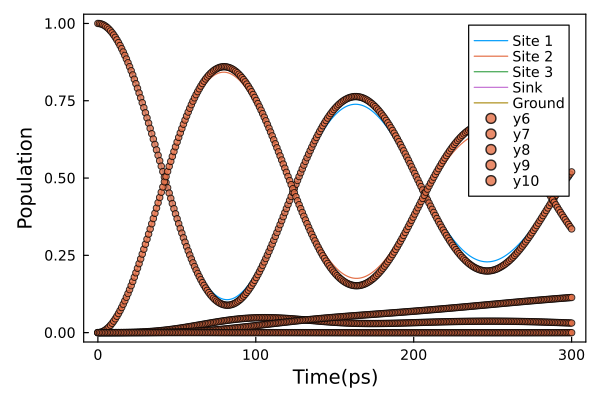

┌ Warning: Indices Base.OneTo(1) of attribute `markercolor` does not match data indices 1:300.
└ @ Plots C:\Users\saura\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `seriescolor` does not match data indices 1:300.
└ @ Plots C:\Users\saura\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `linecolor` does not match data indices 1:300.
└ @ Plots C:\Users\saura\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `fillcolor` does not match data indices 1:300.
└ @ Plots C:\Users\saura\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `markercolor` does not match data indices 1:300.
└ @ Plots C:\Users\saura\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Indices Base.OneTo(1) of attribute `markercolor` does not match data indices 1:300.
└ @ Plots C:\Users\saura\.julia\packages\Plots\sxUvK\src\utils.jl:141
┌ Warning: Ind

┌ Warning: Indices Base.OneTo(1) of attribute `markercolor` does not match data indices 1:300.
└ @ Plots C:\Users\saura\.julia\packages\Plots\sxUvK\src\utils.jl:141


In [25]:
steps=300 #Integer(tf/dt)
# real(sol.u[30][7])
zero=[real(sol2.u[i][1]) for i in 1:steps]
excited=[real(sol2.u[i][10]) for i in 1:steps]
ground=[real(sol2.u[i][19]) for i in 1:steps]
one=[real(sol2.u[i][28]) for i in 1:steps]
two=[real(sol2.u[i][37]) for i in 1:steps]
# times = LinRange(0, tf, steps)
plot!(times, excited, seriestype=:scatter, mc=[2], ms=3, ma=0.8)
plot!(times, ground,seriestype=:scatter, mc=[2], ms=3, ma=0.8)
plot!(times, one, seriestype=:scatter, mc=[2], ms=3, ma=0.8)
plot!(times, two, seriestype=:scatter, mc=[2], ms=3, ma=0.8)
plot!(times, zero, seriestype=:scatter, mc=[2], ms=3, ma=0.8)

In [19]:
using JLD2

In [22]:
zero = [real(sol2.u[i][1]) for i in 1:steps]
excited = [real(sol2.u[i][10]) for i in 1:steps]
ground = [real(sol2.u[i][19]) for i in 1:steps]
one = [real(sol2.u[i][28]) for i in 1:steps]
two = [real(sol2.u[i][37]) for i in 1:steps]

jldsave("fmo_vectorized.jld2"; times, zero,excited,ground,one,two )



In [9]:
load("fmo_vectorized.jld2","one")


2×2 Matrix{ComplexF64}:
 1.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im

<?xml version="1.0" encoding="utf-8"?>
<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" width="600" height="400" viewBox="0 0 2400 1600">
<defs>
  <clipPath id="clip440">
    <rect x="0" y="0" width="2400" height="1600"/>
  </clipPath>
</defs>
<path clip-path="url(#clip440)" d="M0 1600 L2400 1600 L2400 0 L0 0  Z" fill="#ffffff" fill-rule="evenodd" fill-opacity="1"/>
<defs>
  <clipPath id="clip441">
    <rect x="480" y="0" width="1681" height="1600"/>
  </clipPath>
</defs>
<path clip-path="url(#clip440)" d="M249.542 1410.9 L2352.76 1410.9 L2352.76 47.2441 L249.542 47.2441  Z" fill="#ffffff" fill-rule="evenodd" fill-opacity="1"/>
<defs>
  <clipPath id="clip442">
    <rect x="249" y="47" width="2104" height="1365"/>
  </clipPath>
</defs>
<polyline clip-path="url(#clip442)" style="stroke:#000000; stroke-linecap:round; stroke-linejoin:round; stroke-width:2; stroke-opacity:0.1; fill:none" points="309.067,1410.9 309.067,47.2441 "/>
<polyline clip-path="url(#clip442)" style="stroke:#000000; stroke-linecap:round; stroke-linejoin:round; stroke-width:2; stroke-opacity:0.1; fill:none" points="970.455,1410.9 970.455,47.2441 "/>
<polyline clip-path="url(#clip442)" style="stroke:#000000; stroke-linecap:round; stroke-linejoin:round; stroke-width:2; stroke-opacity:0.1; fill:none" points="1631.84,1410.9 1631.84,47.2441 "/>
<polyline clip-path="url(#clip442)" style="stroke:#000000; stroke-linecap:round; stroke-linejoin:round; stroke-width:2; stroke-opacity:0.1; fill:none" points="2293.23,1410.9 2293.23,47.2441 "/>
<polyline clip-path="url(#clip440)" style="stroke:#000000; stroke-linecap:round; stroke-linejoin:round; stroke-width:4; stroke-opacity:1; fill:none" points="249.542,1410.9 2352.76,1410.9 "/>
<polyline clip-path="url(#clip440)" style="stroke:#000000; stroke-linecap:round; stroke-linejoin:round; stroke-width:4; stroke-opacity:1; fill:none" points="309.067,1410.9 309.067,1392 "/>
<polyline clip-path="url(#clip440)" style="stroke:#000000; stroke-linecap:round; stroke-linejoin:round; stroke-width:4; stroke-opacity:1; fill:none" points="970.455,1410.9 970.455,1392 "/>
<polyline clip-path="url(#clip440)" style="stroke:#000000; stroke-linecap:round; stroke-linejoin:round; stroke-width:4; stroke-opacity:1; fill:none" points="1631.84,1410.9 1631.84,1392 "/>
<polyline clip-path="url(#clip440)" style="stroke:#000000; stroke-linecap:round; stroke-linejoin:round; stroke-width:4; stroke-opacity:1; fill:none" points="2293.23,1410.9 2293.23,1392 "/>
<path clip-path="url(#clip440)" d="M309.067 1441.82 Q305.456 1441.82 303.627 1445.38 Q301.822 1448.92 301.822 1456.05 Q301.822 1463.16 303.627 1466.72 Q305.456 1470.26 309.067 1470.26 Q312.701 1470.26 314.507 1466.72 Q316.335 1463.16 316.335 1456.05 Q316.335 1448.92 314.507 1445.38 Q312.701 1441.82 309.067 1441.82 M309.067 1438.11 Q314.877 1438.11 317.933 1442.72 Q321.011 1447.3 321.011 1456.05 Q321.011 1464.78 317.933 1469.38 Q314.877 1473.97 309.067 1473.97 Q303.257 1473.97 300.178 1469.38 Q297.123 1464.78 297.123 1456.05 Q297.123 1447.3 300.178 1442.72 Q303.257 1438.11 309.067 1438.11 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M850.524 1485.02 L858.163 1485.02 L858.163 1458.66 L849.853 1460.32 L849.853 1456.06 L858.117 1454.4 L862.793 1454.4 L862.793 1485.02 L870.432 1485.02 L870.432 1488.96 L850.524 1488.96 L850.524 1485.02 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M879.876 1483.08 L884.76 1483.08 L884.76 1488.96 L879.876 1488.96 L879.876 1483.08 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M904.945 1457.48 Q901.334 1457.48 899.506 1461.04 Q897.7 1464.58 897.7 1471.71 Q897.7 1478.82 899.506 1482.38 Q901.334 1485.92 904.945 1485.92 Q908.58 1485.92 910.385 1482.38 Q912.214 1478.82 912.214 1471.71 Q912.214 1464.58 910.385 1461.04 Q908.58 1457.48 904.945 1457.48 M904.945 1453.77 Q910.755 1453.77 913.811 1458.38 Q916.89 1462.96 916.89 1471.71 Q916.89 1480.44 913.811 1485.04 Q910.755 1489.63 904.945 1489.63 Q899.135 1489.63 896.056 1485.04 Q893.001 1480.44 893.001 1471.71 Q893.001 1462.96 896.056 1458.38 Q899.135 1453.77 904.945 1453.77 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M953.278 1463.49 L942.7 1474.12 L953.278 1484.7 L950.524 1487.5 L939.899 1476.87 L929.274 1487.5 L926.542 1484.7 L937.098 1474.12 L926.542 1463.49 L929.274 1460.69 L939.899 1471.32 L950.524 1460.69 L953.278 1463.49 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M965.639 1485.02 L973.278 1485.02 L973.278 1458.66 L964.968 1460.32 L964.968 1456.06 L973.232 1454.4 L977.908 1454.4 L977.908 1485.02 L985.547 1485.02 L985.547 1488.96 L965.639 1488.96 L965.639 1485.02 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M1004.99 1457.48 Q1001.38 1457.48 999.551 1461.04 Q997.746 1464.58 997.746 1471.71 Q997.746 1478.82 999.551 1482.38 Q1001.38 1485.92 1004.99 1485.92 Q1008.63 1485.92 1010.43 1482.38 Q1012.26 1478.82 1012.26 1471.71 Q1012.26 1464.58 1010.43 1461.04 Q1008.63 1457.48 1004.99 1457.48 M1004.99 1453.77 Q1010.8 1453.77 1013.86 1458.38 Q1016.94 1462.96 1016.94 1471.71 Q1016.94 1480.44 1013.86 1485.04 Q1010.8 1489.63 1004.99 1489.63 Q999.181 1489.63 996.102 1485.04 Q993.047 1480.44 993.047 1471.71 Q993.047 1462.96 996.102 1458.38 Q999.181 1453.77 1004.99 1453.77 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M1016.94 1447.87 L1041.05 1447.87 L1041.05 1451.07 L1016.94 1451.07 L1016.94 1447.87 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M1049.91 1458.35 L1056.11 1458.35 L1056.11 1436.93 L1049.36 1438.28 L1049.36 1434.82 L1056.07 1433.47 L1059.87 1433.47 L1059.87 1458.35 L1066.08 1458.35 L1066.08 1461.55 L1049.91 1461.55 L1049.91 1458.35 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M1085.26 1446.41 Q1087.99 1446.99 1089.51 1448.83 Q1091.06 1450.68 1091.06 1453.38 Q1091.06 1457.54 1088.2 1459.82 Q1085.34 1462.09 1080.07 1462.09 Q1078.31 1462.09 1076.42 1461.73 Q1074.56 1461.4 1072.57 1460.7 L1072.57 1457.03 Q1074.15 1457.95 1076.03 1458.42 Q1077.91 1458.89 1079.96 1458.89 Q1083.53 1458.89 1085.4 1457.48 Q1087.28 1456.07 1087.28 1453.38 Q1087.28 1450.9 1085.53 1449.51 Q1083.8 1448.1 1080.69 1448.1 L1077.42 1448.1 L1077.42 1444.98 L1080.84 1444.98 Q1083.65 1444.98 1085.13 1443.87 Q1086.62 1442.74 1086.62 1440.63 Q1086.62 1438.47 1085.08 1437.32 Q1083.55 1436.16 1080.69 1436.16 Q1079.13 1436.16 1077.35 1436.49 Q1075.56 1436.83 1073.42 1437.55 L1073.42 1434.16 Q1075.58 1433.56 1077.46 1433.26 Q1079.36 1432.96 1081.03 1432.96 Q1085.36 1432.96 1087.88 1434.93 Q1090.4 1436.89 1090.4 1440.24 Q1090.4 1442.57 1089.06 1444.19 Q1087.73 1445.79 1085.26 1446.41 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M1516 1485.02 L1532.32 1485.02 L1532.32 1488.96 L1510.37 1488.96 L1510.37 1485.02 Q1513.04 1482.27 1517.62 1477.64 Q1522.22 1472.98 1523.41 1471.64 Q1525.65 1469.12 1526.53 1467.38 Q1527.43 1465.62 1527.43 1463.93 Q1527.43 1461.18 1525.49 1459.44 Q1523.57 1457.71 1520.47 1457.71 Q1518.27 1457.71 1515.81 1458.47 Q1513.38 1459.23 1510.6 1460.79 L1510.6 1456.06 Q1513.43 1454.93 1515.88 1454.35 Q1518.34 1453.77 1520.37 1453.77 Q1525.74 1453.77 1528.94 1456.46 Q1532.13 1459.14 1532.13 1463.63 Q1532.13 1465.76 1531.32 1467.68 Q1530.53 1469.58 1528.43 1472.17 Q1527.85 1472.85 1524.75 1476.06 Q1521.65 1479.26 1516 1485.02 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M1542.13 1483.08 L1547.02 1483.08 L1547.02 1488.96 L1542.13 1488.96 L1542.13 1483.08 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M1567.2 1457.48 Q1563.59 1457.48 1561.76 1461.04 Q1559.96 1464.58 1559.96 1471.71 Q1559.96 1478.82 1561.76 1482.38 Q1563.59 1485.92 1567.2 1485.92 Q1570.84 1485.92 1572.64 1482.38 Q1574.47 1478.82 1574.47 1471.71 Q1574.47 1464.58 1572.64 1461.04 Q1570.84 1457.48 1567.2 1457.48 M1567.2 1453.77 Q1573.01 1453.77 1576.07 1458.38 Q1579.15 1462.96 1579.15 1471.71 Q1579.15 1480.44 1576.07 1485.04 Q1573.01 1489.63 1567.2 1489.63 Q1561.39 1489.63 1558.31 1485.04 Q1555.26 1480.44 1555.26 1471.71 Q1555.26 1462.96 1558.31 1458.38 Q1561.39 1453.77 1567.2 1453.77 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M1615.53 1463.49 L1604.96 1474.12 L1615.53 1484.7 L1612.78 1487.5 L1602.15 1476.87 L1591.53 1487.5 L1588.8 1484.7 L1599.35 1474.12 L1588.8 1463.49 L1591.53 1460.69 L1602.15 1471.32 L1612.78 1460.69 L1615.53 1463.49 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M1627.9 1485.02 L1635.53 1485.02 L1635.53 1458.66 L1627.22 1460.32 L1627.22 1456.06 L1635.49 1454.4 L1640.16 1454.4 L1640.16 1485.02 L1647.8 1485.02 L1647.8 1488.96 L1627.9 1488.96 L1627.9 1485.02 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M1667.25 1457.48 Q1663.64 1457.48 1661.81 1461.04 Q1660 1464.58 1660 1471.71 Q1660 1478.82 1661.81 1482.38 Q1663.64 1485.92 1667.25 1485.92 Q1670.88 1485.92 1672.69 1482.38 Q1674.52 1478.82 1674.52 1471.71 Q1674.52 1464.58 1672.69 1461.04 Q1670.88 1457.48 1667.25 1457.48 M1667.25 1453.77 Q1673.06 1453.77 1676.11 1458.38 Q1679.19 1462.96 1679.19 1471.71 Q1679.19 1480.44 1676.11 1485.04 Q1673.06 1489.63 1667.25 1489.63 Q1661.44 1489.63 1658.36 1485.04 Q1655.3 1480.44 1655.3 1471.71 Q1655.3 1462.96 1658.36 1458.38 Q1661.44 1453.77 1667.25 1453.77 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M1679.19 1447.87 L1703.3 1447.87 L1703.3 1451.07 L1679.19 1451.07 L1679.19 1447.87 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M1712.16 1458.35 L1718.37 1458.35 L1718.37 1436.93 L1711.62 1438.28 L1711.62 1434.82 L1718.33 1433.47 L1722.13 1433.47 L1722.13 1458.35 L1728.34 1458.35 L1728.34 1461.55 L1712.16 1461.55 L1712.16 1458.35 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M1747.52 1446.41 Q1750.25 1446.99 1751.77 1448.83 Q1753.31 1450.68 1753.31 1453.38 Q1753.31 1457.54 1750.45 1459.82 Q1747.6 1462.09 1742.33 1462.09 Q1740.56 1462.09 1738.68 1461.73 Q1736.82 1461.4 1734.82 1460.7 L1734.82 1457.03 Q1736.4 1457.95 1738.29 1458.42 Q1740.17 1458.89 1742.22 1458.89 Q1745.79 1458.89 1747.65 1457.48 Q1749.53 1456.07 1749.53 1453.38 Q1749.53 1450.9 1747.78 1449.51 Q1746.05 1448.1 1742.95 1448.1 L1739.68 1448.1 L1739.68 1444.98 L1743.1 1444.98 Q1745.9 1444.98 1747.39 1443.87 Q1748.87 1442.74 1748.87 1440.63 Q1748.87 1438.47 1747.33 1437.32 Q1745.81 1436.16 1742.95 1436.16 Q1741.39 1436.16 1739.6 1436.49 Q1737.82 1436.83 1735.67 1437.55 L1735.67 1434.16 Q1737.83 1433.56 1739.71 1433.26 Q1741.61 1432.96 1743.29 1432.96 Q1747.61 1432.96 1750.13 1434.93 Q1752.65 1436.89 1752.65 1440.24 Q1752.65 1442.57 1751.32 1444.19 Q1749.98 1445.79 1747.52 1446.41 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M2187.46 1470.32 Q2190.81 1471.04 2192.69 1473.31 Q2194.58 1475.58 2194.58 1478.91 Q2194.58 1484.03 2191.07 1486.83 Q2187.55 1489.63 2181.07 1489.63 Q2178.89 1489.63 2176.58 1489.19 Q2174.28 1488.77 2171.83 1487.91 L2171.83 1483.4 Q2173.77 1484.54 2176.09 1485.11 Q2178.4 1485.69 2180.93 1485.69 Q2185.33 1485.69 2187.62 1483.96 Q2189.93 1482.22 2189.93 1478.91 Q2189.93 1475.85 2187.78 1474.14 Q2185.65 1472.41 2181.83 1472.41 L2177.8 1472.41 L2177.8 1468.56 L2182.02 1468.56 Q2185.46 1468.56 2187.29 1467.2 Q2189.12 1465.81 2189.12 1463.22 Q2189.12 1460.55 2187.22 1459.14 Q2185.35 1457.71 2181.83 1457.71 Q2179.91 1457.71 2177.71 1458.12 Q2175.51 1458.54 2172.87 1459.42 L2172.87 1455.25 Q2175.53 1454.51 2177.85 1454.14 Q2180.19 1453.77 2182.25 1453.77 Q2187.57 1453.77 2190.67 1456.2 Q2193.77 1458.61 2193.77 1462.73 Q2193.77 1465.6 2192.13 1467.59 Q2190.49 1469.56 2187.46 1470.32 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M2203.45 1483.08 L2208.33 1483.08 L2208.33 1488.96 L2203.45 1488.96 L2203.45 1483.08 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M2228.52 1457.48 Q2224.91 1457.48 2223.08 1461.04 Q2221.27 1464.58 2221.27 1471.71 Q2221.27 1478.82 2223.08 1482.38 Q2224.91 1485.92 2228.52 1485.92 Q2232.15 1485.92 2233.96 1482.38 Q2235.79 1478.82 2235.79 1471.71 Q2235.79 1464.58 2233.96 1461.04 Q2232.15 1457.48 2228.52 1457.48 M2228.52 1453.77 Q2234.33 1453.77 2237.39 1458.38 Q2240.46 1462.96 2240.46 1471.71 Q2240.46 1480.44 2237.39 1485.04 Q2234.33 1489.63 2228.52 1489.63 Q2222.71 1489.63 2219.63 1485.04 Q2216.58 1480.44 2216.58 1471.71 Q2216.58 1462.96 2219.63 1458.38 Q2222.71 1453.77 2228.52 1453.77 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M2276.85 1463.49 L2266.27 1474.12 L2276.85 1484.7 L2274.1 1487.5 L2263.47 1476.87 L2252.85 1487.5 L2250.12 1484.7 L2260.67 1474.12 L2250.12 1463.49 L2252.85 1460.69 L2263.47 1471.32 L2274.1 1460.69 L2276.85 1463.49 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M2289.21 1485.02 L2296.85 1485.02 L2296.85 1458.66 L2288.54 1460.32 L2288.54 1456.06 L2296.81 1454.4 L2301.48 1454.4 L2301.48 1485.02 L2309.12 1485.02 L2309.12 1488.96 L2289.21 1488.96 L2289.21 1485.02 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M2328.57 1457.48 Q2324.95 1457.48 2323.13 1461.04 Q2321.32 1464.58 2321.32 1471.71 Q2321.32 1478.82 2323.13 1482.38 Q2324.95 1485.92 2328.57 1485.92 Q2332.2 1485.92 2334.01 1482.38 Q2335.83 1478.82 2335.83 1471.71 Q2335.83 1464.58 2334.01 1461.04 Q2332.2 1457.48 2328.57 1457.48 M2328.57 1453.77 Q2334.38 1453.77 2337.43 1458.38 Q2340.51 1462.96 2340.51 1471.71 Q2340.51 1480.44 2337.43 1485.04 Q2334.38 1489.63 2328.57 1489.63 Q2322.76 1489.63 2319.68 1485.04 Q2316.62 1480.44 2316.62 1471.71 Q2316.62 1462.96 2319.68 1458.38 Q2322.76 1453.77 2328.57 1453.77 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M2340.51 1447.87 L2364.62 1447.87 L2364.62 1451.07 L2340.51 1451.07 L2340.51 1447.87 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M2373.48 1458.35 L2379.69 1458.35 L2379.69 1436.93 L2372.93 1438.28 L2372.93 1434.82 L2379.65 1433.47 L2383.45 1433.47 L2383.45 1458.35 L2389.65 1458.35 L2389.65 1461.55 L2373.48 1461.55 L2373.48 1458.35 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M2408.84 1446.41 Q2411.57 1446.99 2413.09 1448.83 Q2414.63 1450.68 2414.63 1453.38 Q2414.63 1457.54 2411.77 1459.82 Q2408.91 1462.09 2403.65 1462.09 Q2401.88 1462.09 2400 1461.73 Q2398.14 1461.4 2396.14 1460.7 L2396.14 1457.03 Q2397.72 1457.95 2399.6 1458.42 Q2401.48 1458.89 2403.53 1458.89 Q2407.11 1458.89 2408.97 1457.48 Q2410.85 1456.07 2410.85 1453.38 Q2410.85 1450.9 2409.1 1449.51 Q2407.37 1448.1 2404.27 1448.1 L2401 1448.1 L2401 1444.98 L2404.42 1444.98 Q2407.22 1444.98 2408.71 1443.87 Q2410.19 1442.74 2410.19 1440.63 Q2410.19 1438.47 2408.65 1437.32 Q2407.13 1436.16 2404.27 1436.16 Q2402.71 1436.16 2400.92 1436.49 Q2399.13 1436.83 2396.99 1437.55 L2396.99 1434.16 Q2399.15 1433.56 2401.03 1433.26 Q2402.93 1432.96 2404.61 1432.96 Q2408.93 1432.96 2411.45 1434.93 Q2413.97 1436.89 2413.97 1440.24 Q2413.97 1442.57 2412.64 1444.19 Q2411.3 1445.79 2408.84 1446.41 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M1181.68 1526.67 L1221.88 1526.67 L1221.88 1532.08 L1205.01 1532.08 L1205.01 1574.19 L1198.55 1574.19 L1198.55 1532.08 L1181.68 1532.08 L1181.68 1526.67 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M1225.83 1538.54 L1231.68 1538.54 L1231.68 1574.19 L1225.83 1574.19 L1225.83 1538.54 M1225.83 1524.66 L1231.68 1524.66 L1231.68 1532.08 L1225.83 1532.08 L1225.83 1524.66 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M1271.69 1545.38 Q1273.89 1541.43 1276.94 1539.56 Q1280 1537.68 1284.14 1537.68 Q1289.71 1537.68 1292.73 1541.59 Q1295.75 1545.48 1295.75 1552.67 L1295.75 1574.19 L1289.87 1574.19 L1289.87 1552.86 Q1289.87 1547.74 1288.05 1545.25 Q1286.24 1542.77 1282.51 1542.77 Q1277.96 1542.77 1275.32 1545.79 Q1272.68 1548.82 1272.68 1554.04 L1272.68 1574.19 L1266.79 1574.19 L1266.79 1552.86 Q1266.79 1547.7 1264.98 1545.25 Q1263.16 1542.77 1259.37 1542.77 Q1254.89 1542.77 1252.24 1545.83 Q1249.6 1548.85 1249.6 1554.04 L1249.6 1574.19 L1243.71 1574.19 L1243.71 1538.54 L1249.6 1538.54 L1249.6 1544.08 Q1251.61 1540.8 1254.41 1539.24 Q1257.21 1537.68 1261.06 1537.68 Q1264.94 1537.68 1267.65 1539.65 Q1270.39 1541.62 1271.69 1545.38 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M1337.93 1554.9 L1337.93 1557.76 L1311 1557.76 Q1311.38 1563.81 1314.63 1566.99 Q1317.91 1570.14 1323.73 1570.14 Q1327.11 1570.14 1330.26 1569.32 Q1333.44 1568.49 1336.56 1566.83 L1336.56 1572.37 Q1333.41 1573.71 1330.1 1574.41 Q1326.79 1575.11 1323.38 1575.11 Q1314.85 1575.11 1309.85 1570.14 Q1304.89 1565.18 1304.89 1556.71 Q1304.89 1547.96 1309.6 1542.83 Q1314.34 1537.68 1322.36 1537.68 Q1329.56 1537.68 1333.73 1542.33 Q1337.93 1546.94 1337.93 1554.9 M1332.07 1553.18 Q1332.01 1548.37 1329.36 1545.51 Q1326.76 1542.64 1322.43 1542.64 Q1317.52 1542.64 1314.56 1545.41 Q1311.64 1548.18 1311.19 1553.21 L1332.07 1553.18 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M1361.61 1524.72 Q1357.34 1532.04 1355.27 1539.21 Q1353.2 1546.37 1353.2 1553.72 Q1353.2 1561.07 1355.27 1568.3 Q1357.37 1575.49 1361.61 1582.78 L1356.51 1582.78 Q1351.74 1575.3 1349.35 1568.07 Q1347 1560.85 1347 1553.72 Q1347 1546.62 1349.35 1539.43 Q1351.71 1532.24 1356.51 1524.72 L1361.61 1524.72 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M1395.7 1539.59 L1395.7 1545.13 Q1393.21 1543.85 1390.54 1543.22 Q1387.87 1542.58 1385 1542.58 Q1380.64 1542.58 1378.44 1543.92 Q1376.28 1545.25 1376.28 1547.93 Q1376.28 1549.96 1377.84 1551.14 Q1379.4 1552.29 1384.11 1553.34 L1386.12 1553.78 Q1392.35 1555.12 1394.96 1557.57 Q1397.61 1559.99 1397.61 1564.35 Q1397.61 1569.32 1393.66 1572.21 Q1389.74 1575.11 1382.87 1575.11 Q1380 1575.11 1376.88 1574.54 Q1373.8 1573.99 1370.36 1572.88 L1370.36 1566.83 Q1373.61 1568.52 1376.76 1569.38 Q1379.91 1570.21 1383 1570.21 Q1387.13 1570.21 1389.36 1568.81 Q1391.59 1567.37 1391.59 1564.8 Q1391.59 1562.41 1389.97 1561.14 Q1388.38 1559.86 1382.93 1558.68 L1380.9 1558.21 Q1375.45 1557.06 1373.03 1554.71 Q1370.61 1552.32 1370.61 1548.18 Q1370.61 1543.15 1374.18 1540.42 Q1377.74 1537.68 1384.3 1537.68 Q1387.55 1537.68 1390.41 1538.16 Q1393.28 1538.63 1395.7 1539.59 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M1406.01 1524.72 L1411.1 1524.72 Q1415.87 1532.24 1418.23 1539.43 Q1420.62 1546.62 1420.62 1553.72 Q1420.62 1560.85 1418.23 1568.07 Q1415.87 1575.3 1411.1 1582.78 L1406.01 1582.78 Q1410.24 1575.49 1412.31 1568.3 Q1414.41 1561.07 1414.41 1553.72 Q1414.41 1546.37 1412.31 1539.21 Q1410.24 1532.04 1406.01 1524.72 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><polyline clip-path="url(#clip442)" style="stroke:#000000; stroke-linecap:round; stroke-linejoin:round; stroke-width:2; stroke-opacity:0.1; fill:none" points="249.542,1371.26 2352.76,1371.26 "/>
<polyline clip-path="url(#clip442)" style="stroke:#000000; stroke-linecap:round; stroke-linejoin:round; stroke-width:2; stroke-opacity:0.1; fill:none" points="249.542,1049.91 2352.76,1049.91 "/>
<polyline clip-path="url(#clip442)" style="stroke:#000000; stroke-linecap:round; stroke-linejoin:round; stroke-width:2; stroke-opacity:0.1; fill:none" points="249.542,728.551 2352.76,728.551 "/>
<polyline clip-path="url(#clip442)" style="stroke:#000000; stroke-linecap:round; stroke-linejoin:round; stroke-width:2; stroke-opacity:0.1; fill:none" points="249.542,407.194 2352.76,407.194 "/>
<polyline clip-path="url(#clip442)" style="stroke:#000000; stroke-linecap:round; stroke-linejoin:round; stroke-width:2; stroke-opacity:0.1; fill:none" points="249.542,85.838 2352.76,85.838 "/>
<polyline clip-path="url(#clip440)" style="stroke:#000000; stroke-linecap:round; stroke-linejoin:round; stroke-width:4; stroke-opacity:1; fill:none" points="249.542,1410.9 249.542,47.2441 "/>
<polyline clip-path="url(#clip440)" style="stroke:#000000; stroke-linecap:round; stroke-linejoin:round; stroke-width:4; stroke-opacity:1; fill:none" points="249.542,1371.26 268.44,1371.26 "/>
<polyline clip-path="url(#clip440)" style="stroke:#000000; stroke-linecap:round; stroke-linejoin:round; stroke-width:4; stroke-opacity:1; fill:none" points="249.542,1049.91 268.44,1049.91 "/>
<polyline clip-path="url(#clip440)" style="stroke:#000000; stroke-linecap:round; stroke-linejoin:round; stroke-width:4; stroke-opacity:1; fill:none" points="249.542,728.551 268.44,728.551 "/>
<polyline clip-path="url(#clip440)" style="stroke:#000000; stroke-linecap:round; stroke-linejoin:round; stroke-width:4; stroke-opacity:1; fill:none" points="249.542,407.194 268.44,407.194 "/>
<polyline clip-path="url(#clip440)" style="stroke:#000000; stroke-linecap:round; stroke-linejoin:round; stroke-width:4; stroke-opacity:1; fill:none" points="249.542,85.838 268.44,85.838 "/>
<path clip-path="url(#clip440)" d="M126.205 1357.06 Q122.593 1357.06 120.765 1360.63 Q118.959 1364.17 118.959 1371.3 Q118.959 1378.4 120.765 1381.97 Q122.593 1385.51 126.205 1385.51 Q129.839 1385.51 131.644 1381.97 Q133.473 1378.4 133.473 1371.3 Q133.473 1364.17 131.644 1360.63 Q129.839 1357.06 126.205 1357.06 M126.205 1353.36 Q132.015 1353.36 135.07 1357.96 Q138.149 1362.55 138.149 1371.3 Q138.149 1380.02 135.07 1384.63 Q132.015 1389.21 126.205 1389.21 Q120.394 1389.21 117.316 1384.63 Q114.26 1380.02 114.26 1371.3 Q114.26 1362.55 117.316 1357.96 Q120.394 1353.36 126.205 1353.36 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M146.366 1382.66 L151.251 1382.66 L151.251 1388.54 L146.366 1388.54 L146.366 1382.66 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M171.436 1357.06 Q167.825 1357.06 165.996 1360.63 Q164.19 1364.17 164.19 1371.3 Q164.19 1378.4 165.996 1381.97 Q167.825 1385.51 171.436 1385.51 Q175.07 1385.51 176.876 1381.97 Q178.704 1378.4 178.704 1371.3 Q178.704 1364.17 176.876 1360.63 Q175.07 1357.06 171.436 1357.06 M171.436 1353.36 Q177.246 1353.36 180.301 1357.96 Q183.38 1362.55 183.38 1371.3 Q183.38 1380.02 180.301 1384.63 Q177.246 1389.21 171.436 1389.21 Q165.626 1389.21 162.547 1384.63 Q159.491 1380.02 159.491 1371.3 Q159.491 1362.55 162.547 1357.96 Q165.626 1353.36 171.436 1353.36 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M201.598 1357.06 Q197.987 1357.06 196.158 1360.63 Q194.352 1364.17 194.352 1371.3 Q194.352 1378.4 196.158 1381.97 Q197.987 1385.51 201.598 1385.51 Q205.232 1385.51 207.037 1381.97 Q208.866 1378.4 208.866 1371.3 Q208.866 1364.17 207.037 1360.63 Q205.232 1357.06 201.598 1357.06 M201.598 1353.36 Q207.408 1353.36 210.463 1357.96 Q213.542 1362.55 213.542 1371.3 Q213.542 1380.02 210.463 1384.63 Q207.408 1389.21 201.598 1389.21 Q195.787 1389.21 192.709 1384.63 Q189.653 1380.02 189.653 1371.3 Q189.653 1362.55 192.709 1357.96 Q195.787 1353.36 201.598 1353.36 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M127.2 1035.71 Q123.589 1035.71 121.76 1039.27 Q119.955 1042.81 119.955 1049.94 Q119.955 1057.05 121.76 1060.61 Q123.589 1064.15 127.2 1064.15 Q130.834 1064.15 132.64 1060.61 Q134.468 1057.05 134.468 1049.94 Q134.468 1042.81 132.64 1039.27 Q130.834 1035.71 127.2 1035.71 M127.2 1032 Q133.01 1032 136.066 1036.61 Q139.144 1041.19 139.144 1049.94 Q139.144 1058.67 136.066 1063.27 Q133.01 1067.86 127.2 1067.86 Q121.39 1067.86 118.311 1063.27 Q115.256 1058.67 115.256 1049.94 Q115.256 1041.19 118.311 1036.61 Q121.39 1032 127.2 1032 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M147.362 1061.31 L152.246 1061.31 L152.246 1067.19 L147.362 1067.19 L147.362 1061.31 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M166.459 1063.25 L182.778 1063.25 L182.778 1067.19 L160.834 1067.19 L160.834 1063.25 Q163.496 1060.5 168.079 1055.87 Q172.686 1051.21 173.866 1049.87 Q176.112 1047.35 176.991 1045.61 Q177.894 1043.85 177.894 1042.16 Q177.894 1039.41 175.95 1037.67 Q174.028 1035.94 170.927 1035.94 Q168.727 1035.94 166.274 1036.7 Q163.843 1037.46 161.065 1039.02 L161.065 1034.29 Q163.89 1033.16 166.343 1032.58 Q168.797 1032 170.834 1032 Q176.204 1032 179.399 1034.69 Q182.593 1037.37 182.593 1041.86 Q182.593 1043.99 181.783 1045.91 Q180.996 1047.81 178.889 1050.4 Q178.311 1051.08 175.209 1054.29 Q172.107 1057.49 166.459 1063.25 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M192.639 1032.63 L210.996 1032.63 L210.996 1036.56 L196.922 1036.56 L196.922 1045.03 Q197.94 1044.69 198.959 1044.52 Q199.977 1044.34 200.996 1044.34 Q206.783 1044.34 210.162 1047.51 Q213.542 1050.68 213.542 1056.1 Q213.542 1061.68 210.07 1064.78 Q206.598 1067.86 200.278 1067.86 Q198.102 1067.86 195.834 1067.49 Q193.588 1067.12 191.181 1066.38 L191.181 1061.68 Q193.264 1062.81 195.487 1063.37 Q197.709 1063.92 200.186 1063.92 Q204.19 1063.92 206.528 1061.82 Q208.866 1059.71 208.866 1056.1 Q208.866 1052.49 206.528 1050.38 Q204.19 1048.27 200.186 1048.27 Q198.311 1048.27 196.436 1048.69 Q194.584 1049.11 192.639 1049.99 L192.639 1032.63 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M126.205 714.349 Q122.593 714.349 120.765 717.914 Q118.959 721.456 118.959 728.585 Q118.959 735.692 120.765 739.257 Q122.593 742.798 126.205 742.798 Q129.839 742.798 131.644 739.257 Q133.473 735.692 133.473 728.585 Q133.473 721.456 131.644 717.914 Q129.839 714.349 126.205 714.349 M126.205 710.646 Q132.015 710.646 135.07 715.252 Q138.149 719.835 138.149 728.585 Q138.149 737.312 135.07 741.919 Q132.015 746.502 126.205 746.502 Q120.394 746.502 117.316 741.919 Q114.26 737.312 114.26 728.585 Q114.26 719.835 117.316 715.252 Q120.394 710.646 126.205 710.646 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M146.366 739.951 L151.251 739.951 L151.251 745.831 L146.366 745.831 L146.366 739.951 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M161.482 711.271 L179.839 711.271 L179.839 715.206 L165.765 715.206 L165.765 723.678 Q166.783 723.331 167.802 723.169 Q168.82 722.984 169.839 722.984 Q175.626 722.984 179.005 726.155 Q182.385 729.326 182.385 734.743 Q182.385 740.321 178.913 743.423 Q175.44 746.502 169.121 746.502 Q166.945 746.502 164.677 746.132 Q162.431 745.761 160.024 745.02 L160.024 740.321 Q162.107 741.456 164.329 742.011 Q166.552 742.567 169.028 742.567 Q173.033 742.567 175.371 740.46 Q177.709 738.354 177.709 734.743 Q177.709 731.132 175.371 729.025 Q173.033 726.919 169.028 726.919 Q167.153 726.919 165.278 727.335 Q163.427 727.752 161.482 728.632 L161.482 711.271 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M201.598 714.349 Q197.987 714.349 196.158 717.914 Q194.352 721.456 194.352 728.585 Q194.352 735.692 196.158 739.257 Q197.987 742.798 201.598 742.798 Q205.232 742.798 207.037 739.257 Q208.866 735.692 208.866 728.585 Q208.866 721.456 207.037 717.914 Q205.232 714.349 201.598 714.349 M201.598 710.646 Q207.408 710.646 210.463 715.252 Q213.542 719.835 213.542 728.585 Q213.542 737.312 210.463 741.919 Q207.408 746.502 201.598 746.502 Q195.787 746.502 192.709 741.919 Q189.653 737.312 189.653 728.585 Q189.653 719.835 192.709 715.252 Q195.787 710.646 201.598 710.646 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M127.2 392.993 Q123.589 392.993 121.76 396.558 Q119.955 400.099 119.955 407.229 Q119.955 414.335 121.76 417.9 Q123.589 421.442 127.2 421.442 Q130.834 421.442 132.64 417.9 Q134.468 414.335 134.468 407.229 Q134.468 400.099 132.64 396.558 Q130.834 392.993 127.2 392.993 M127.2 389.289 Q133.01 389.289 136.066 393.896 Q139.144 398.479 139.144 407.229 Q139.144 415.956 136.066 420.562 Q133.01 425.146 127.2 425.146 Q121.39 425.146 118.311 420.562 Q115.256 415.956 115.256 407.229 Q115.256 398.479 118.311 393.896 Q121.39 389.289 127.2 389.289 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M147.362 418.595 L152.246 418.595 L152.246 424.474 L147.362 424.474 L147.362 418.595 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M161.251 389.914 L183.473 389.914 L183.473 391.905 L170.927 424.474 L166.042 424.474 L177.848 393.849 L161.251 393.849 L161.251 389.914 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M192.639 389.914 L210.996 389.914 L210.996 393.849 L196.922 393.849 L196.922 402.322 Q197.94 401.974 198.959 401.812 Q199.977 401.627 200.996 401.627 Q206.783 401.627 210.162 404.798 Q213.542 407.97 213.542 413.386 Q213.542 418.965 210.07 422.067 Q206.598 425.146 200.278 425.146 Q198.102 425.146 195.834 424.775 Q193.588 424.405 191.181 423.664 L191.181 418.965 Q193.264 420.099 195.487 420.655 Q197.709 421.21 200.186 421.21 Q204.19 421.21 206.528 419.104 Q208.866 416.998 208.866 413.386 Q208.866 409.775 206.528 407.669 Q204.19 405.562 200.186 405.562 Q198.311 405.562 196.436 405.979 Q194.584 406.396 192.639 407.275 L192.639 389.914 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M117.015 99.1829 L124.654 99.1829 L124.654 72.8173 L116.343 74.4839 L116.343 70.2247 L124.607 68.558 L129.283 68.558 L129.283 99.1829 L136.922 99.1829 L136.922 103.118 L117.015 103.118 L117.015 99.1829 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M146.366 97.2384 L151.251 97.2384 L151.251 103.118 L146.366 103.118 L146.366 97.2384 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M171.436 71.6367 Q167.825 71.6367 165.996 75.2015 Q164.19 78.7432 164.19 85.8728 Q164.19 92.9792 165.996 96.544 Q167.825 100.086 171.436 100.086 Q175.07 100.086 176.876 96.544 Q178.704 92.9792 178.704 85.8728 Q178.704 78.7432 176.876 75.2015 Q175.07 71.6367 171.436 71.6367 M171.436 67.933 Q177.246 67.933 180.301 72.5395 Q183.38 77.1228 183.38 85.8728 Q183.38 94.5996 180.301 99.206 Q177.246 103.789 171.436 103.789 Q165.626 103.789 162.547 99.206 Q159.491 94.5996 159.491 85.8728 Q159.491 77.1228 162.547 72.5395 Q165.626 67.933 171.436 67.933 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M201.598 71.6367 Q197.987 71.6367 196.158 75.2015 Q194.352 78.7432 194.352 85.8728 Q194.352 92.9792 196.158 96.544 Q197.987 100.086 201.598 100.086 Q205.232 100.086 207.037 96.544 Q208.866 92.9792 208.866 85.8728 Q208.866 78.7432 207.037 75.2015 Q205.232 71.6367 201.598 71.6367 M201.598 67.933 Q207.408 67.933 210.463 72.5395 Q213.542 77.1228 213.542 85.8728 Q213.542 94.5996 210.463 99.206 Q207.408 103.789 201.598 103.789 Q195.787 103.789 192.709 99.206 Q189.653 94.5996 189.653 85.8728 Q189.653 77.1228 192.709 72.5395 Q195.787 67.933 201.598 67.933 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M22.818 872.331 L46.4666 881.052 L46.4666 863.578 L22.818 872.331 M16.4842 875.959 L16.4842 868.67 L64.0042 850.56 L64.0042 857.244 L51.8138 861.573 L51.8138 882.993 L64.0042 887.322 L64.0042 894.101 L16.4842 875.959 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M35.1993 816.121 Q31.2526 813.925 29.3747 810.87 Q27.4968 807.814 27.4968 803.676 Q27.4968 798.106 31.4117 795.083 Q35.2948 792.059 42.4881 792.059 L64.0042 792.059 L64.0042 797.947 L42.679 797.947 Q37.5546 797.947 35.072 799.762 Q32.5894 801.576 32.5894 805.3 Q32.5894 809.851 35.6131 812.493 Q38.6368 815.135 43.8567 815.135 L64.0042 815.135 L64.0042 821.023 L42.679 821.023 Q37.5228 821.023 35.072 822.837 Q32.5894 824.651 32.5894 828.439 Q32.5894 832.927 35.6449 835.569 Q38.6686 838.21 43.8567 838.21 L64.0042 838.21 L64.0042 844.099 L28.3562 844.099 L28.3562 838.21 L33.8944 838.21 Q30.616 836.205 29.0564 833.404 Q27.4968 830.603 27.4968 826.752 Q27.4968 822.869 29.4702 820.164 Q31.4436 817.426 35.1993 816.121 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M58.657 774.712 L77.5631 774.712 L77.5631 780.601 L28.3562 780.601 L28.3562 774.712 L33.7671 774.712 Q30.5842 772.866 29.0564 770.066 Q27.4968 767.233 27.4968 763.318 Q27.4968 756.825 32.6531 752.783 Q37.8093 748.709 46.212 748.709 Q54.6147 748.709 59.771 752.783 Q64.9272 756.825 64.9272 763.318 Q64.9272 767.233 63.3994 770.066 Q61.8398 772.866 58.657 774.712 M46.212 754.788 Q39.7508 754.788 36.0905 757.461 Q32.3984 760.103 32.3984 764.75 Q32.3984 769.397 36.0905 772.071 Q39.7508 774.712 46.212 774.712 Q52.6732 774.712 56.3653 772.071 Q60.0256 769.397 60.0256 764.75 Q60.0256 760.103 56.3653 757.461 Q52.6732 754.788 46.212 754.788 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M14.479 739.001 L14.479 733.144 L64.0042 733.144 L64.0042 739.001 L14.479 739.001 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M28.3562 720.89 L28.3562 715.034 L64.0042 715.034 L64.0042 720.89 L28.3562 720.89 M14.479 720.89 L14.479 715.034 L21.895 715.034 L21.895 720.89 L14.479 720.89 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M18.2347 696.987 L28.3562 696.987 L28.3562 684.924 L32.9077 684.924 L32.9077 696.987 L52.2594 696.987 Q56.6199 696.987 57.8613 695.81 Q59.1026 694.6 59.1026 690.94 L59.1026 684.924 L64.0042 684.924 L64.0042 690.94 Q64.0042 697.719 61.4897 700.297 Q58.9434 702.875 52.2594 702.875 L32.9077 702.875 L32.9077 707.172 L28.3562 707.172 L28.3562 702.875 L18.2347 702.875 L18.2347 696.987 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M49.9359 677.826 L28.3562 677.826 L28.3562 671.97 L49.7131 671.97 Q54.7739 671.97 57.3202 669.997 Q59.8346 668.023 59.8346 664.077 Q59.8346 659.334 56.8109 656.597 Q53.7872 653.828 48.5673 653.828 L28.3562 653.828 L28.3562 647.971 L64.0042 647.971 L64.0042 653.828 L58.5296 653.828 Q61.7762 655.96 63.3676 658.793 Q64.9272 661.594 64.9272 665.318 Q64.9272 671.461 61.1078 674.644 Q57.2883 677.826 49.9359 677.826 M27.4968 663.09 L27.4968 663.09 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M33.7671 612.451 L14.479 612.451 L14.479 606.594 L64.0042 606.594 L64.0042 612.451 L58.657 612.451 Q61.8398 614.297 63.3994 617.129 Q64.9272 619.93 64.9272 623.877 Q64.9272 630.338 59.771 634.412 Q54.6147 638.455 46.212 638.455 Q37.8093 638.455 32.6531 634.412 Q27.4968 630.338 27.4968 623.877 Q27.4968 619.93 29.0564 617.129 Q30.5842 614.297 33.7671 612.451 M46.212 632.407 Q52.6732 632.407 56.3653 629.765 Q60.0256 627.092 60.0256 622.445 Q60.0256 617.798 56.3653 615.124 Q52.6732 612.451 46.212 612.451 Q39.7508 612.451 36.0905 615.124 Q32.3984 617.798 32.3984 622.445 Q32.3984 627.092 36.0905 629.765 Q39.7508 632.407 46.212 632.407 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip440)" d="M44.7161 564.039 L47.5806 564.039 L47.5806 590.966 Q53.6281 590.584 56.8109 587.338 Q59.9619 584.06 59.9619 578.235 Q59.9619 574.861 59.1344 571.71 Q58.3069 568.527 56.6518 565.408 L62.1899 565.408 Q63.5267 568.559 64.227 571.869 Q64.9272 575.179 64.9272 578.585 Q64.9272 587.115 59.9619 592.112 Q54.9967 597.077 46.5303 597.077 Q37.7774 597.077 32.6531 592.367 Q27.4968 587.624 27.4968 579.604 Q27.4968 572.41 32.1438 568.241 Q36.7589 564.039 44.7161 564.039 M42.9973 569.896 Q38.1912 569.96 35.3266 572.601 Q32.4621 575.211 32.4621 579.54 Q32.4621 584.442 35.2312 587.402 Q38.0002 590.33 43.0292 590.775 L42.9973 569.896 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><polyline clip-path="url(#clip442)" style="stroke:#009af9; stroke-linecap:round; stroke-linejoin:round; stroke-width:8; stroke-opacity:1; fill:none" points="309.067,85.838 315.703,86.3343 322.339,87.8139 328.975,90.2686 335.611,93.6884 342.247,98.0621 348.883,103.377 355.519,109.618 362.155,116.771 368.791,124.819 375.427,133.743 382.063,143.525 388.699,154.146 395.335,165.382 401.971,177.42 408.607,190.238 415.243,203.858 421.879,218.203 428.515,233.25 435.151,248.967 441.787,265.328 448.423,282.304 455.059,299.867 461.695,317.985 468.331,336.627 474.967,355.76 481.603,375.353 488.239,395.374 494.875,415.789 501.511,436.564 508.147,457.667 514.783,479.063 521.419,500.719 528.055,522.598 534.691,544.668 541.327,566.892 547.963,589.236 554.599,611.666 561.235,634.147 567.871,656.645 574.507,679.126 581.143,701.554 587.779,723.899 594.415,746.126 601.051,768.203 607.687,790.089 614.323,811.783 620.959,833.233 627.595,854.408 634.231,875.278 640.867,895.815 647.503,915.991 654.139,935.774 660.775,955.143 667.411,974.07 674.047,992.553 680.683,1010.55 687.319,1028.03 693.955,1044.99 700.591,1061.39 707.227,1077.22 713.863,1092.47 720.499,1107.11 727.135,1121.13 733.771,1134.51 740.407,1147.23 747.043,1159.29 753.679,1170.66 760.315,1181.34 766.951,1191.32 773.587,1200.59 780.223,1209.13 786.859,1216.94 793.495,1224.01 800.131,1230.34 806.767,1235.92 813.403,1240.75 820.039,1244.83 826.675,1248.15 833.311,1250.72 839.947,1252.54 846.583,1253.6 853.219,1253.92 859.855,1253.49 866.491,1252.32 873.127,1250.41 879.763,1247.78 886.399,1244.43 893.035,1240.27 899.671,1235.36 906.307,1229.82 912.943,1223.6 919.579,1216.73 926.215,1209.21 932.851,1201.07 939.487,1192.3 946.123,1182.93 952.759,1173 959.395,1162.53 966.031,1151.53 972.667,1140.02 979.303,1128.02 985.939,1115.54 992.575,1102.62 999.211,1089.28 1005.85,1075.53 1012.48,1061.41 1019.12,1046.94 1025.75,1032.15 1032.39,1017.05 1039.03,1001.67 1045.66,986.04 1052.3,970.18 1058.93,954.118 1065.57,937.88 1072.21,921.491 1078.84,904.977 1085.48,888.382 1092.11,871.708 1098.75,854.98 1105.39,838.223 1112.02,821.462 1118.66,804.722 1125.29,788.029 1131.93,771.406 1138.57,754.88 1145.2,738.472 1151.84,722.206 1158.47,706.104 1165.11,690.191 1171.75,674.488 1178.38,659.016 1185.02,643.8 1191.65,628.857 1198.29,614.209 1204.93,599.873 1211.56,585.87 1218.2,572.219 1224.83,558.919 1231.47,546.006 1238.11,533.495 1244.74,521.405 1251.38,509.749 1258.01,498.542 1264.65,487.8 1271.29,477.535 1277.92,467.761 1284.56,458.489 1291.19,449.731 1297.83,441.498 1304.47,433.799 1311.1,426.642 1317.74,420.037 1324.37,413.991 1331.01,408.501 1337.65,403.581 1344.28,399.235 1350.92,395.466 1357.55,392.28 1364.19,389.679 1370.83,387.665 1377.46,386.239 1384.1,385.399 1390.73,385.146 1397.37,385.478 1404.01,386.391 1410.64,387.882 1417.28,389.946 1423.91,392.579 1430.55,395.772 1437.19,399.52 1443.82,403.816 1450.46,408.653 1457.09,414.02 1463.73,419.908 1470.37,426.305 1477,433.201 1483.64,440.584 1490.27,448.44 1496.91,456.756 1503.55,465.519 1510.18,474.714 1516.82,484.324 1523.45,494.336 1530.09,504.731 1536.73,515.494 1543.36,526.606 1550,538.05 1556.63,549.808 1563.27,561.86 1569.91,574.189 1576.54,586.773 1583.18,599.595 1589.81,612.633 1596.45,625.869 1603.09,639.281 1609.72,652.85 1616.36,666.554 1622.99,680.374 1629.63,694.288 1636.27,708.276 1642.9,722.316 1649.54,736.388 1656.17,750.472 1662.81,764.548 1669.45,778.594 1676.08,792.591 1682.72,806.519 1689.35,820.358 1695.99,834.088 1702.63,847.69 1709.26,861.145 1715.9,874.435 1722.53,887.539 1729.17,900.442 1735.81,913.125 1742.44,925.572 1749.08,937.766 1755.71,949.69 1762.35,961.33 1768.99,972.668 1775.62,983.691 1782.26,994.385 1788.89,1004.73 1795.53,1014.73 1802.17,1024.35 1808.8,1033.59 1815.44,1042.44 1822.07,1050.89 1828.71,1058.92 1835.35,1066.53 1841.98,1073.7 1848.62,1080.44 1855.25,1086.72 1861.89,1092.56 1868.53,1097.93 1875.16,1102.83 1881.8,1107.27 1888.43,1111.23 1895.07,1114.71 1901.71,1117.71 1908.34,1120.23 1914.98,1122.27 1921.61,1123.82 1928.25,1124.89 1934.89,1125.48 1941.52,1125.6 1948.16,1125.24 1954.79,1124.4 1961.43,1123.09 1968.07,1121.32 1974.7,1119.08 1981.34,1116.39 1987.97,1113.25 1994.61,1109.67 2001.25,1105.65 2007.88,1101.21 2014.52,1096.35 2021.15,1091.09 2027.79,1085.43 2034.43,1079.38 2041.06,1072.96 2047.7,1066.17 2054.33,1059.04 2060.97,1051.57 2067.61,1043.78 2074.24,1035.67 2080.88,1027.27 2087.51,1018.59 2094.15,1009.64 2100.79,1000.43 2107.42,990.996 2114.06,981.339 2120.69,971.478 2127.33,961.43 2133.97,951.212 2140.6,940.84 2147.24,930.33 2153.87,919.7 2160.51,908.967 2167.15,898.146 2173.78,887.257 2180.42,876.315 2187.05,865.339 2193.69,854.346 2200.33,843.352 2206.96,832.374 2213.6,821.428 2220.23,810.531 2226.87,799.7 2233.51,788.952 2240.14,778.301 2246.78,767.764 2253.41,757.355 2260.05,747.09 2266.69,736.983 2273.32,727.05 2279.96,717.304 2286.59,707.76 2293.23,698.43 "/>
<polyline clip-path="url(#clip442)" style="stroke:#e26f46; stroke-linecap:round; stroke-linejoin:round; stroke-width:8; stroke-opacity:1; fill:none" points="309.067,1371.26 315.703,1370.77 322.339,1369.29 328.975,1366.85 335.611,1363.44 342.247,1359.08 348.883,1353.78 355.519,1347.55 362.155,1340.42 368.791,1332.4 375.427,1323.52 382.063,1313.77 388.699,1303.2 395.335,1292.03 401.971,1280.06 408.607,1267.32 415.243,1253.8 421.879,1239.56 428.515,1224.64 435.151,1209.06 441.787,1192.86 448.423,1176.06 455.059,1158.7 461.695,1140.8 468.331,1122.41 474.967,1103.54 481.603,1084.24 488.239,1064.55 494.875,1044.48 501.511,1024.09 508.147,1003.4 514.783,982.451 521.419,961.276 528.055,939.912 534.691,918.392 541.327,896.753 547.963,875.029 554.599,853.256 561.235,831.469 567.871,809.702 574.507,787.991 581.143,766.367 587.779,744.866 594.415,723.52 601.051,702.364 607.687,681.437 614.323,660.742 620.959,640.33 627.595,620.231 634.231,600.476 640.867,581.09 647.503,562.103 654.139,543.538 660.775,525.423 667.411,507.781 674.047,490.615 680.683,473.967 687.319,457.856 693.955,442.303 700.591,427.328 707.227,412.951 713.863,399.176 720.499,386.032 727.135,373.532 733.771,361.69 740.407,350.521 747.043,340.035 753.679,330.244 760.315,321.157 766.951,312.784 773.587,305.132 780.223,298.209 786.859,292.024 793.495,286.577 800.131,281.873 806.767,277.913 813.403,274.699 820.039,272.232 826.675,270.511 833.311,269.534 839.947,269.298 846.583,269.795 853.219,271.024 859.855,272.977 866.491,275.649 873.127,279.033 879.763,283.118 886.399,287.895 893.035,293.464 899.671,299.746 906.307,306.642 912.943,314.173 919.579,322.329 926.215,331.094 932.851,340.451 939.487,350.414 946.123,360.929 952.759,371.976 959.395,383.513 966.031,395.545 972.667,408.051 979.303,421.009 985.939,434.397 992.575,448.192 999.211,462.371 1005.85,476.911 1012.48,491.789 1019.12,506.98 1025.75,522.456 1032.39,538.198 1039.03,554.184 1045.66,570.387 1052.3,586.783 1058.93,603.347 1065.57,620.054 1072.21,636.881 1078.84,653.802 1085.48,670.791 1092.11,687.826 1098.75,704.888 1105.39,721.951 1112.02,738.994 1118.66,755.991 1125.29,772.919 1131.93,789.756 1138.57,806.479 1145.2,823.065 1151.84,839.491 1158.47,855.736 1165.11,871.779 1171.75,887.6 1178.38,903.178 1185.02,918.495 1191.65,933.529 1198.29,948.262 1204.93,962.676 1211.56,976.754 1218.2,990.478 1224.83,1003.85 1231.47,1016.83 1238.11,1029.42 1244.74,1041.58 1251.38,1053.31 1258.01,1064.6 1264.65,1075.43 1271.29,1085.79 1277.92,1095.67 1284.56,1105.05 1291.19,1113.92 1297.83,1122.28 1304.47,1130.12 1311.1,1137.42 1317.74,1144.18 1324.37,1150.4 1331.01,1156.08 1337.65,1161.2 1344.28,1165.75 1350.92,1169.75 1357.55,1173.17 1364.19,1176.02 1370.83,1178.3 1377.46,1180.01 1384.1,1181.15 1390.73,1181.71 1397.37,1181.71 1404.01,1181.14 1410.64,1180.01 1417.28,1178.32 1423.91,1176.08 1430.55,1173.29 1437.19,1169.96 1443.82,1166.09 1450.46,1161.7 1457.09,1156.8 1463.73,1151.39 1470.37,1145.49 1477,1139.1 1483.64,1132.24 1490.27,1124.92 1496.91,1117.16 1503.55,1108.96 1510.18,1100.34 1516.82,1091.32 1523.45,1081.91 1530.09,1072.13 1536.73,1062 1543.36,1051.53 1550,1040.73 1556.63,1029.63 1563.27,1018.25 1569.91,1006.6 1576.54,994.709 1583.18,982.584 1589.81,970.25 1596.45,957.726 1603.09,945.033 1609.72,932.189 1616.36,919.215 1622.99,906.132 1629.63,892.958 1636.27,879.715 1642.9,866.422 1649.54,853.1 1656.17,839.768 1662.81,826.448 1669.45,813.158 1676.08,799.918 1682.72,786.749 1689.35,773.669 1695.99,760.699 1702.63,747.856 1709.26,735.159 1715.9,722.627 1722.53,710.276 1729.17,698.124 1735.81,686.191 1742.44,674.493 1749.08,663.045 1755.71,651.866 1762.35,640.969 1768.99,630.371 1775.62,620.086 1782.26,610.129 1788.89,600.513 1795.53,591.25 1802.17,582.354 1808.8,573.836 1815.44,565.707 1822.07,557.979 1828.71,550.66 1835.35,543.761 1841.98,537.29 1848.62,531.255 1855.25,525.664 1861.89,520.524 1868.53,515.837 1875.16,511.613 1881.8,507.854 1888.43,504.566 1895.07,501.752 1901.71,499.413 1908.34,497.553 1914.98,496.17 1921.61,495.266 1928.25,494.841 1934.89,494.887 1941.52,495.409 1948.16,496.402 1954.79,497.865 1961.43,499.792 1968.07,502.18 1974.7,505.023 1981.34,508.314 1987.97,512.047 1994.61,516.215 2001.25,520.809 2007.88,525.821 2014.52,531.241 2021.15,537.06 2027.79,543.267 2034.43,549.851 2041.06,556.8 2047.7,564.103 2054.33,571.747 2060.97,579.719 2067.61,588.006 2074.24,596.593 2080.88,605.466 2087.51,614.612 2094.15,624.017 2100.79,633.664 2107.42,643.537 2114.06,653.62 2120.69,663.897 2127.33,674.352 2133.97,684.969 2140.6,695.731 2147.24,706.621 2153.87,717.623 2160.51,728.72 2167.15,739.895 2173.78,751.132 2180.42,762.412 2187.05,773.72 2193.69,785.038 2200.33,796.35 2206.96,807.638 2213.6,818.887 2220.23,830.081 2226.87,841.203 2233.51,852.238 2240.14,863.169 2246.78,873.983 2253.41,884.663 2260.05,895.195 2266.69,905.564 2273.32,915.757 2279.96,925.759 2286.59,935.557 2293.23,945.139 "/>
<polyline clip-path="url(#clip442)" style="stroke:#3da44d; stroke-linecap:round; stroke-linejoin:round; stroke-width:8; stroke-opacity:1; fill:none" points="309.067,1371.26 315.703,1371.26 322.339,1371.26 328.975,1371.25 335.611,1371.24 342.247,1371.23 348.883,1371.22 355.519,1371.2 362.155,1371.18 368.791,1371.16 375.427,1371.12 382.063,1371.09 388.699,1371.04 395.335,1370.98 401.971,1370.92 408.607,1370.84 415.243,1370.76 421.879,1370.66 428.515,1370.54 435.151,1370.41 441.787,1370.27 448.423,1370.1 455.059,1369.92 461.695,1369.72 468.331,1369.5 474.967,1369.25 481.603,1368.99 488.239,1368.7 494.875,1368.38 501.511,1368.04 508.147,1367.67 514.783,1367.27 521.419,1366.85 528.055,1366.4 534.691,1365.91 541.327,1365.4 547.963,1364.86 554.599,1364.28 561.235,1363.68 567.871,1363.04 574.507,1362.38 581.143,1361.68 587.779,1360.96 594.415,1360.2 601.051,1359.41 607.687,1358.59 614.323,1357.75 620.959,1356.87 627.595,1355.97 634.231,1355.04 640.867,1354.09 647.503,1353.11 654.139,1352.11 660.775,1351.08 667.411,1350.04 674.047,1348.98 680.683,1347.9 687.319,1346.81 693.955,1345.7 700.591,1344.58 707.227,1343.46 713.863,1342.32 720.499,1341.17 727.135,1340.02 733.771,1338.87 740.407,1337.71 747.043,1336.56 753.679,1335.41 760.315,1334.25 766.951,1333.11 773.587,1331.97 780.223,1330.84 786.859,1329.73 793.495,1328.62 800.131,1327.53 806.767,1326.46 813.403,1325.4 820.039,1324.37 826.675,1323.35 833.311,1322.36 839.947,1321.4 846.583,1320.46 853.219,1319.55 859.855,1318.68 866.491,1317.83 873.127,1317.02 879.763,1316.24 886.399,1315.51 893.035,1314.79 899.671,1314.12 906.307,1313.48 912.943,1312.89 919.579,1312.33 926.215,1311.82 932.851,1311.34 939.487,1310.91 946.123,1310.51 952.759,1310.16 959.395,1309.85 966.031,1309.59 972.667,1309.36 979.303,1309.17 985.939,1309.03 992.575,1308.93 999.211,1308.87 1005.85,1308.84 1012.48,1308.86 1019.12,1308.91 1025.75,1309 1032.39,1309.13 1039.03,1309.29 1045.66,1309.49 1052.3,1309.71 1058.93,1309.97 1065.57,1310.26 1072.21,1310.57 1078.84,1310.92 1085.48,1311.27 1092.11,1311.65 1098.75,1312.06 1105.39,1312.48 1112.02,1312.93 1118.66,1313.4 1125.29,1313.88 1131.93,1314.38 1138.57,1314.89 1145.2,1315.42 1151.84,1315.96 1158.47,1316.51 1165.11,1317.07 1171.75,1317.63 1178.38,1318.2 1185.02,1318.76 1191.65,1319.33 1198.29,1319.91 1204.93,1320.47 1211.56,1321.04 1218.2,1321.6 1224.83,1322.16 1231.47,1322.71 1238.11,1323.25 1244.74,1323.79 1251.38,1324.32 1258.01,1324.83 1264.65,1325.34 1271.29,1325.83 1277.92,1326.32 1284.56,1326.79 1291.19,1327.24 1297.83,1327.68 1304.47,1328.11 1311.1,1328.52 1317.74,1328.92 1324.37,1329.3 1331.01,1329.66 1337.65,1330.01 1344.28,1330.33 1350.92,1330.64 1357.55,1330.93 1364.19,1331.21 1370.83,1331.46 1377.46,1331.7 1384.1,1331.92 1390.73,1332.12 1397.37,1332.3 1404.01,1332.47 1410.64,1332.62 1417.28,1332.75 1423.91,1332.87 1430.55,1332.97 1437.19,1333.05 1443.82,1333.11 1450.46,1333.16 1457.09,1333.2 1463.73,1333.21 1470.37,1333.21 1477,1333.2 1483.64,1333.17 1490.27,1333.13 1496.91,1333.08 1503.55,1333.01 1510.18,1332.93 1516.82,1332.83 1523.45,1332.73 1530.09,1332.61 1536.73,1332.49 1543.36,1332.35 1550,1332.21 1556.63,1332.05 1563.27,1331.89 1569.91,1331.72 1576.54,1331.54 1583.18,1331.36 1589.81,1331.17 1596.45,1330.98 1603.09,1330.78 1609.72,1330.58 1616.36,1330.37 1622.99,1330.16 1629.63,1329.95 1636.27,1329.74 1642.9,1329.53 1649.54,1329.31 1656.17,1329.1 1662.81,1328.88 1669.45,1328.67 1676.08,1328.46 1682.72,1328.24 1689.35,1328.03 1695.99,1327.82 1702.63,1327.62 1709.26,1327.41 1715.9,1327.21 1722.53,1327.01 1729.17,1326.82 1735.81,1326.63 1742.44,1326.44 1749.08,1326.26 1755.71,1326.08 1762.35,1325.91 1768.99,1325.74 1775.62,1325.57 1782.26,1325.41 1788.89,1325.26 1795.53,1325.11 1802.17,1324.97 1808.8,1324.83 1815.44,1324.7 1822.07,1324.57 1828.71,1324.45 1835.35,1324.34 1841.98,1324.23 1848.62,1324.13 1855.25,1324.03 1861.89,1323.94 1868.53,1323.86 1875.16,1323.78 1881.8,1323.71 1888.43,1323.65 1895.07,1323.59 1901.71,1323.54 1908.34,1323.5 1914.98,1323.46 1921.61,1323.43 1928.25,1323.4 1934.89,1323.38 1941.52,1323.36 1948.16,1323.35 1954.79,1323.34 1961.43,1323.34 1968.07,1323.35 1974.7,1323.37 1981.34,1323.39 1987.97,1323.42 1994.61,1323.45 2001.25,1323.49 2007.88,1323.54 2014.52,1323.6 2021.15,1323.66 2027.79,1323.73 2034.43,1323.81 2041.06,1323.89 2047.7,1323.98 2054.33,1324.08 2060.97,1324.19 2067.61,1324.3 2074.24,1324.42 2080.88,1324.55 2087.51,1324.68 2094.15,1324.82 2100.79,1324.97 2107.42,1325.12 2114.06,1325.29 2120.69,1325.45 2127.33,1325.63 2133.97,1325.81 2140.6,1325.99 2147.24,1326.19 2153.87,1326.38 2160.51,1326.59 2167.15,1326.8 2173.78,1327.01 2180.42,1327.23 2187.05,1327.45 2193.69,1327.67 2200.33,1327.9 2206.96,1328.14 2213.6,1328.37 2220.23,1328.61 2226.87,1328.86 2233.51,1329.1 2240.14,1329.35 2246.78,1329.6 2253.41,1329.85 2260.05,1330.1 2266.69,1330.35 2273.32,1330.61 2279.96,1330.86 2286.59,1331.11 2293.23,1331.37 "/>
<polyline clip-path="url(#clip442)" style="stroke:#c271d2; stroke-linecap:round; stroke-linejoin:round; stroke-width:8; stroke-opacity:1; fill:none" points="309.067,1371.26 315.703,1371.26 322.339,1371.26 328.975,1371.26 335.611,1371.26 342.247,1371.26 348.883,1371.26 355.519,1371.26 362.155,1371.26 368.791,1371.26 375.427,1371.26 382.063,1371.26 388.699,1371.25 395.335,1371.25 401.971,1371.25 408.607,1371.24 415.243,1371.24 421.879,1371.23 428.515,1371.23 435.151,1371.22 441.787,1371.21 448.423,1371.19 455.059,1371.18 461.695,1371.16 468.331,1371.14 474.967,1371.12 481.603,1371.09 488.239,1371.07 494.875,1371.03 501.511,1371 508.147,1370.96 514.783,1370.91 521.419,1370.86 528.055,1370.81 534.691,1370.74 541.327,1370.68 547.963,1370.61 554.599,1370.53 561.235,1370.44 567.871,1370.35 574.507,1370.25 581.143,1370.14 587.779,1370.03 594.415,1369.9 601.051,1369.76 607.687,1369.62 614.323,1369.46 620.959,1369.3 627.595,1369.12 634.231,1368.93 640.867,1368.73 647.503,1368.52 654.139,1368.3 660.775,1368.06 667.411,1367.82 674.047,1367.55 680.683,1367.28 687.319,1366.99 693.955,1366.69 700.591,1366.37 707.227,1366.04 713.863,1365.7 720.499,1365.34 727.135,1364.96 733.771,1364.57 740.407,1364.17 747.043,1363.75 753.679,1363.31 760.315,1362.86 766.951,1362.4 773.587,1361.92 780.223,1361.43 786.859,1360.92 793.495,1360.39 800.131,1359.85 806.767,1359.3 813.403,1358.73 820.039,1358.15 826.675,1357.56 833.311,1356.95 839.947,1356.33 846.583,1355.7 853.219,1355.06 859.855,1354.4 866.491,1353.74 873.127,1353.06 879.763,1352.37 886.399,1351.68 893.035,1350.97 899.671,1350.26 906.307,1349.54 912.943,1348.81 919.579,1348.07 926.215,1347.32 932.851,1346.57 939.487,1345.82 946.123,1345.06 952.759,1344.29 959.395,1343.52 966.031,1342.75 972.667,1341.97 979.303,1341.19 985.939,1340.41 992.575,1339.63 999.211,1338.84 1005.85,1338.06 1012.48,1337.27 1019.12,1336.49 1025.75,1335.7 1032.39,1334.92 1039.03,1334.14 1045.66,1333.36 1052.3,1332.58 1058.93,1331.81 1065.57,1331.04 1072.21,1330.27 1078.84,1329.51 1085.48,1328.75 1092.11,1327.99 1098.75,1327.24 1105.39,1326.49 1112.02,1325.74 1118.66,1325.01 1125.29,1324.27 1131.93,1323.55 1138.57,1322.83 1145.2,1322.12 1151.84,1321.41 1158.47,1320.71 1165.11,1320.01 1171.75,1319.33 1178.38,1318.65 1185.02,1317.98 1191.65,1317.31 1198.29,1316.66 1204.93,1316.01 1211.56,1315.37 1218.2,1314.73 1224.83,1314.1 1231.47,1313.47 1238.11,1312.86 1244.74,1312.24 1251.38,1311.64 1258.01,1311.04 1264.65,1310.45 1271.29,1309.86 1277.92,1309.28 1284.56,1308.7 1291.19,1308.13 1297.83,1307.57 1304.47,1307.01 1311.1,1306.45 1317.74,1305.9 1324.37,1305.36 1331.01,1304.82 1337.65,1304.28 1344.28,1303.75 1350.92,1303.22 1357.55,1302.7 1364.19,1302.18 1370.83,1301.66 1377.46,1301.15 1384.1,1300.64 1390.73,1300.13 1397.37,1299.62 1404.01,1299.12 1410.64,1298.62 1417.28,1298.12 1423.91,1297.62 1430.55,1297.12 1437.19,1296.62 1443.82,1296.13 1450.46,1295.63 1457.09,1295.14 1463.73,1294.64 1470.37,1294.15 1477,1293.66 1483.64,1293.16 1490.27,1292.67 1496.91,1292.18 1503.55,1291.68 1510.18,1291.19 1516.82,1290.69 1523.45,1290.19 1530.09,1289.7 1536.73,1289.2 1543.36,1288.7 1550,1288.2 1556.63,1287.69 1563.27,1287.19 1569.91,1286.68 1576.54,1286.17 1583.18,1285.66 1589.81,1285.15 1596.45,1284.64 1603.09,1284.12 1609.72,1283.6 1616.36,1283.08 1622.99,1282.55 1629.63,1282.03 1636.27,1281.5 1642.9,1280.96 1649.54,1280.43 1656.17,1279.89 1662.81,1279.35 1669.45,1278.81 1676.08,1278.26 1682.72,1277.72 1689.35,1277.17 1695.99,1276.61 1702.63,1276.06 1709.26,1275.5 1715.9,1274.94 1722.53,1274.37 1729.17,1273.8 1735.81,1273.24 1742.44,1272.67 1749.08,1272.1 1755.71,1271.53 1762.35,1270.95 1768.99,1270.38 1775.62,1269.8 1782.26,1269.21 1788.89,1268.63 1795.53,1268.04 1802.17,1267.45 1808.8,1266.86 1815.44,1266.27 1822.07,1265.67 1828.71,1265.07 1835.35,1264.47 1841.98,1263.87 1848.62,1263.27 1855.25,1262.66 1861.89,1262.05 1868.53,1261.44 1875.16,1260.83 1881.8,1260.22 1888.43,1259.61 1895.07,1259 1901.71,1258.38 1908.34,1257.77 1914.98,1257.15 1921.61,1256.53 1928.25,1255.92 1934.89,1255.3 1941.52,1254.68 1948.16,1254.06 1954.79,1253.44 1961.43,1252.82 1968.07,1252.2 1974.7,1251.58 1981.34,1250.96 1987.97,1250.34 1994.61,1249.72 2001.25,1249.1 2007.88,1248.48 2014.52,1247.87 2021.15,1247.25 2027.79,1246.64 2034.43,1246.03 2041.06,1245.41 2047.7,1244.8 2054.33,1244.19 2060.97,1243.59 2067.61,1242.98 2074.24,1242.38 2080.88,1241.77 2087.51,1241.17 2094.15,1240.57 2100.79,1239.98 2107.42,1239.39 2114.06,1238.79 2120.69,1238.2 2127.33,1237.62 2133.97,1237.03 2140.6,1236.45 2147.24,1235.87 2153.87,1235.3 2160.51,1234.73 2167.15,1234.16 2173.78,1233.59 2180.42,1233.03 2187.05,1232.46 2193.69,1231.91 2200.33,1231.35 2206.96,1230.8 2213.6,1230.25 2220.23,1229.71 2226.87,1229.16 2233.51,1228.62 2240.14,1228.09 2246.78,1227.55 2253.41,1227.02 2260.05,1226.49 2266.69,1225.97 2273.32,1225.45 2279.96,1224.93 2286.59,1224.41 2293.23,1223.9 "/>
<polyline clip-path="url(#clip442)" style="stroke:#ac8d18; stroke-linecap:round; stroke-linejoin:round; stroke-width:8; stroke-opacity:1; fill:none" points="309.067,1371.26 315.703,1371.26 322.339,1371.26 328.975,1371.26 335.611,1371.26 342.247,1371.26 348.883,1371.26 355.519,1371.25 362.155,1371.25 368.791,1371.25 375.427,1371.25 382.063,1371.25 388.699,1371.25 395.335,1371.24 401.971,1371.24 408.607,1371.24 415.243,1371.24 421.879,1371.24 428.515,1371.24 435.151,1371.23 441.787,1371.23 448.423,1371.23 455.059,1371.23 461.695,1371.22 468.331,1371.22 474.967,1371.22 481.603,1371.22 488.239,1371.21 494.875,1371.21 501.511,1371.21 508.147,1371.2 514.783,1371.2 521.419,1371.19 528.055,1371.19 534.691,1371.19 541.327,1371.18 547.963,1371.18 554.599,1371.18 561.235,1371.17 567.871,1371.17 574.507,1371.17 581.143,1371.17 587.779,1371.17 594.415,1371.17 601.051,1371.17 607.687,1371.17 614.323,1371.17 620.959,1371.17 627.595,1371.17 634.231,1371.17 640.867,1371.17 647.503,1371.17 654.139,1371.17 660.775,1371.17 667.411,1371.17 674.047,1371.17 680.683,1371.18 687.319,1371.18 693.955,1371.18 700.591,1371.19 707.227,1371.19 713.863,1371.19 720.499,1371.19 727.135,1371.19 733.771,1371.19 740.407,1371.2 747.043,1371.2 753.679,1371.2 760.315,1371.2 766.951,1371.2 773.587,1371.2 780.223,1371.2 786.859,1371.2 793.495,1371.21 800.131,1371.21 806.767,1371.21 813.403,1371.22 820.039,1371.22 826.675,1371.22 833.311,1371.23 839.947,1371.24 846.583,1371.24 853.219,1371.25 859.855,1371.26 866.491,1371.27 873.127,1371.28 879.763,1371.29 886.399,1371.3 893.035,1371.31 899.671,1371.32 906.307,1371.33 912.943,1371.34 919.579,1371.35 926.215,1371.36 932.851,1371.37 939.487,1371.38 946.123,1371.38 952.759,1371.39 959.395,1371.4 966.031,1371.41 972.667,1371.42 979.303,1371.43 985.939,1371.44 992.575,1371.45 999.211,1371.46 1005.85,1371.47 1012.48,1371.49 1019.12,1371.5 1025.75,1371.51 1032.39,1371.53 1039.03,1371.54 1045.66,1371.55 1052.3,1371.57 1058.93,1371.58 1065.57,1371.6 1072.21,1371.61 1078.84,1371.62 1085.48,1371.63 1092.11,1371.64 1098.75,1371.66 1105.39,1371.67 1112.02,1371.68 1118.66,1371.69 1125.29,1371.7 1131.93,1371.7 1138.57,1371.71 1145.2,1371.71 1151.84,1371.72 1158.47,1371.72 1165.11,1371.72 1171.75,1371.72 1178.38,1371.72 1185.02,1371.73 1191.65,1371.73 1198.29,1371.72 1204.93,1371.72 1211.56,1371.73 1218.2,1371.73 1224.83,1371.73 1231.47,1371.73 1238.11,1371.73 1244.74,1371.73 1251.38,1371.73 1258.01,1371.73 1264.65,1371.73 1271.29,1371.73 1277.92,1371.72 1284.56,1371.72 1291.19,1371.72 1297.83,1371.72 1304.47,1371.71 1311.1,1371.71 1317.74,1371.7 1324.37,1371.7 1331.01,1371.69 1337.65,1371.69 1344.28,1371.68 1350.92,1371.68 1357.55,1371.67 1364.19,1371.67 1370.83,1371.66 1377.46,1371.66 1384.1,1371.65 1390.73,1371.65 1397.37,1371.64 1404.01,1371.64 1410.64,1371.63 1417.28,1371.63 1423.91,1371.62 1430.55,1371.62 1437.19,1371.62 1443.82,1371.62 1450.46,1371.62 1457.09,1371.62 1463.73,1371.62 1470.37,1371.62 1477,1371.62 1483.64,1371.62 1490.27,1371.62 1496.91,1371.62 1503.55,1371.62 1510.18,1371.62 1516.82,1371.62 1523.45,1371.63 1530.09,1371.63 1536.73,1371.63 1543.36,1371.63 1550,1371.63 1556.63,1371.63 1563.27,1371.63 1569.91,1371.63 1576.54,1371.63 1583.18,1371.63 1589.81,1371.63 1596.45,1371.63 1603.09,1371.63 1609.72,1371.64 1616.36,1371.64 1622.99,1371.64 1629.63,1371.64 1636.27,1371.65 1642.9,1371.65 1649.54,1371.65 1656.17,1371.66 1662.81,1371.67 1669.45,1371.67 1676.08,1371.68 1682.72,1371.69 1689.35,1371.7 1695.99,1371.71 1702.63,1371.72 1709.26,1371.73 1715.9,1371.74 1722.53,1371.76 1729.17,1371.77 1735.81,1371.79 1742.44,1371.8 1749.08,1371.82 1755.71,1371.84 1762.35,1371.85 1768.99,1371.87 1775.62,1371.89 1782.26,1371.9 1788.89,1371.92 1795.53,1371.93 1802.17,1371.94 1808.8,1371.96 1815.44,1371.97 1822.07,1371.98 1828.71,1372 1835.35,1372.01 1841.98,1372.02 1848.62,1372.03 1855.25,1372.04 1861.89,1372.05 1868.53,1372.06 1875.16,1372.07 1881.8,1372.08 1888.43,1372.09 1895.07,1372.09 1901.71,1372.1 1908.34,1372.1 1914.98,1372.11 1921.61,1372.11 1928.25,1372.11 1934.89,1372.11 1941.52,1372.11 1948.16,1372.11 1954.79,1372.11 1961.43,1372.11 1968.07,1372.11 1974.7,1372.1 1981.34,1372.1 1987.97,1372.1 1994.61,1372.1 2001.25,1372.09 2007.88,1372.09 2014.52,1372.09 2021.15,1372.09 2027.79,1372.08 2034.43,1372.08 2041.06,1372.08 2047.7,1372.08 2054.33,1372.08 2060.97,1372.08 2067.61,1372.08 2074.24,1372.08 2080.88,1372.08 2087.51,1372.09 2094.15,1372.09 2100.79,1372.09 2107.42,1372.1 2114.06,1372.1 2120.69,1372.11 2127.33,1372.11 2133.97,1372.12 2140.6,1372.13 2147.24,1372.13 2153.87,1372.14 2160.51,1372.15 2167.15,1372.16 2173.78,1372.16 2180.42,1372.17 2187.05,1372.18 2193.69,1372.19 2200.33,1372.19 2206.96,1372.2 2213.6,1372.21 2220.23,1372.22 2226.87,1372.23 2233.51,1372.24 2240.14,1372.25 2246.78,1372.25 2253.41,1372.26 2260.05,1372.27 2266.69,1372.28 2273.32,1372.28 2279.96,1372.29 2286.59,1372.3 2293.23,1372.3 "/>
<polyline clip-path="url(#clip442)" style="stroke:#00a9ad; stroke-linecap:round; stroke-linejoin:round; stroke-width:8; stroke-opacity:1; fill:none" stroke-dasharray="32, 20" points="309.067,85.838 315.703,86.3333 322.339,87.8118 328.975,90.2653 335.611,93.6841 342.247,98.0569 348.883,103.371 355.519,109.613 362.155,116.766 368.791,124.814 375.427,133.738 382.063,143.52 388.699,154.138 395.335,165.57 401.971,177.794 408.607,190.785 415.243,204.518 421.879,218.968 428.515,234.106 435.151,249.905 441.787,266.336 448.423,283.37 455.059,300.976 461.695,319.122 468.331,337.778 474.967,356.911 481.603,376.488 488.239,396.477 494.875,416.843 501.511,437.554 508.147,458.573 514.783,479.868 521.419,501.404 528.055,523.146 534.691,545.06 541.327,567.111 547.963,589.264 554.599,611.485 561.235,633.74 567.871,655.995 574.507,678.215 581.143,700.369 587.779,722.422 594.415,744.343 601.051,766.098 607.687,787.658 614.323,808.99 620.959,830.064 627.595,850.851 634.231,871.322 640.867,891.449 647.503,911.204 654.139,930.56 660.775,949.492 667.411,967.975 674.047,985.986 680.683,1003.5 687.319,1020.5 693.955,1036.95 700.591,1052.85 707.227,1068.17 713.863,1082.89 720.499,1097 727.135,1110.48 733.771,1123.32 740.407,1135.49 747.043,1147 753.679,1157.83 760.315,1167.96 766.951,1177.4 773.587,1186.12 780.223,1194.13 786.859,1201.42 793.495,1207.98 800.131,1213.82 806.767,1218.92 813.403,1223.29 820.039,1226.92 826.675,1229.82 833.311,1231.99 839.947,1233.44 846.583,1234.16 853.219,1234.17 859.855,1233.46 866.491,1232.05 873.127,1229.94 879.763,1227.14 886.399,1223.67 893.035,1219.54 899.671,1214.75 906.307,1209.31 912.943,1203.25 919.579,1196.58 926.215,1189.31 932.851,1181.46 939.487,1173.04 946.123,1164.07 952.759,1154.58 959.395,1144.57 966.031,1134.07 972.667,1123.1 979.303,1111.67 985.939,1099.81 992.575,1087.55 999.211,1074.89 1005.85,1061.87 1012.48,1048.5 1019.12,1034.81 1025.75,1020.82 1032.39,1006.56 1039.03,992.045 1045.66,977.301 1052.3,962.354 1058.93,947.225 1065.57,931.94 1072.21,916.521 1078.84,900.994 1085.48,885.382 1092.11,869.709 1098.75,853.999 1105.39,838.276 1112.02,822.562 1118.66,806.882 1125.29,791.258 1131.93,775.713 1138.57,760.27 1145.2,744.951 1151.84,729.778 1158.47,714.773 1165.11,699.956 1171.75,685.348 1178.38,670.97 1185.02,656.841 1191.65,642.981 1198.29,629.407 1204.93,616.14 1211.56,603.195 1218.2,590.591 1224.83,578.343 1231.47,566.467 1238.11,554.979 1244.74,543.893 1251.38,533.222 1258.01,522.981 1264.65,513.18 1271.29,503.833 1277.92,494.95 1284.56,486.541 1291.19,478.616 1297.83,471.182 1304.47,464.249 1311.1,457.824 1317.74,451.912 1324.37,446.52 1331.01,441.652 1337.65,437.312 1344.28,433.504 1350.92,430.229 1357.55,427.49 1364.19,425.287 1370.83,423.621 1377.46,422.491 1384.1,421.895 1390.73,421.831 1397.37,422.296 1404.01,423.287 1410.64,424.798 1417.28,426.825 1423.91,429.363 1430.55,432.403 1437.19,435.939 1443.82,439.963 1450.46,444.467 1457.09,449.44 1463.73,454.874 1470.37,460.757 1477,467.079 1483.64,473.827 1490.27,480.99 1496.91,488.555 1503.55,496.509 1510.18,504.837 1516.82,513.526 1523.45,522.561 1530.09,531.927 1536.73,541.608 1543.36,551.589 1550,561.853 1556.63,572.384 1563.27,583.165 1569.91,594.18 1576.54,605.41 1583.18,616.839 1589.81,628.448 1596.45,640.221 1603.09,652.138 1609.72,664.182 1616.36,676.335 1622.99,688.578 1629.63,700.893 1636.27,713.262 1642.9,725.668 1649.54,738.091 1656.17,750.514 1662.81,762.919 1669.45,775.288 1676.08,787.602 1682.72,799.846 1689.35,812.002 1695.99,824.052 1702.63,835.98 1709.26,847.77 1715.9,859.405 1722.53,870.87 1729.17,882.148 1735.81,893.226 1742.44,904.088 1749.08,914.719 1755.71,925.107 1762.35,935.237 1768.99,945.097 1775.62,954.675 1782.26,963.957 1788.89,972.934 1795.53,981.593 1802.17,989.924 1808.8,997.918 1815.44,1005.56 1822.07,1012.86 1828.71,1019.78 1835.35,1026.34 1841.98,1032.52 1848.62,1038.31 1855.25,1043.72 1861.89,1048.73 1868.53,1053.34 1875.16,1057.54 1881.8,1061.34 1888.43,1064.73 1895.07,1067.71 1901.71,1070.27 1908.34,1072.43 1914.98,1074.16 1921.61,1075.49 1928.25,1076.4 1934.89,1076.91 1941.52,1077 1948.16,1076.69 1954.79,1075.98 1961.43,1074.87 1968.07,1073.37 1974.7,1071.48 1981.34,1069.2 1987.97,1066.56 1994.61,1063.54 2001.25,1060.16 2007.88,1056.43 2014.52,1052.36 2021.15,1047.94 2027.79,1043.2 2034.43,1038.15 2041.06,1032.78 2047.7,1027.12 2054.33,1021.17 2060.97,1014.94 2067.61,1008.45 2074.24,1001.71 2080.88,994.726 2087.51,987.516 2094.15,980.092 2100.79,972.465 2107.42,964.648 2114.06,956.656 2120.69,948.502 2127.33,940.199 2133.97,931.761 2140.6,923.202 2147.24,914.535 2153.87,905.775 2160.51,896.935 2167.15,888.031 2173.78,879.075 2180.42,870.083 2187.05,861.067 2193.69,852.042 2200.33,843.023 2206.96,834.021 2213.6,825.052 2220.23,816.128 2226.87,807.263 2233.51,798.47 2240.14,789.762 2246.78,781.153 2253.41,772.653 2260.05,764.277 2266.69,756.035 2273.32,747.939 2279.96,740 2286.59,732.231 2293.23,724.641 "/>
<polyline clip-path="url(#clip442)" style="stroke:#ed5d92; stroke-linecap:round; stroke-linejoin:round; stroke-width:8; stroke-opacity:1; fill:none" stroke-dasharray="32, 20" points="309.067,1371.26 315.703,1370.77 322.339,1369.3 328.975,1366.85 335.611,1363.44 342.247,1359.08 348.883,1353.79 355.519,1347.57 362.155,1340.44 368.791,1332.42 375.427,1323.54 382.063,1313.81 388.699,1303.24 395.335,1291.88 401.971,1279.73 408.607,1266.83 415.243,1253.2 421.879,1238.87 428.515,1223.87 435.151,1208.22 441.787,1191.96 448.423,1175.12 455.059,1157.73 461.695,1139.82 468.331,1121.42 474.967,1102.58 481.603,1083.32 488.239,1063.67 494.875,1043.68 501.511,1023.37 508.147,1002.79 514.783,981.96 521.419,960.926 528.055,939.72 534.691,918.378 541.327,896.936 547.963,875.428 554.599,853.889 561.235,832.354 567.871,810.857 574.507,789.432 581.143,768.113 587.779,746.933 594.415,725.923 601.051,705.117 607.687,684.545 614.323,664.238 620.959,644.225 627.595,624.535 634.231,605.198 640.867,586.239 647.503,567.687 654.139,549.566 660.775,531.9 667.411,514.715 674.047,498.032 680.683,481.873 687.319,466.259 693.955,451.21 700.591,436.744 707.227,422.878 713.863,409.628 720.499,397.011 727.135,385.04 733.771,373.727 740.407,363.086 747.043,353.126 753.679,343.857 760.315,335.287 766.951,327.424 773.587,320.273 780.223,313.839 786.859,308.128 793.495,303.14 800.131,298.877 806.767,295.341 813.403,292.53 820.039,290.443 826.675,289.077 833.311,288.427 839.947,288.49 846.583,289.26 853.219,290.73 859.855,292.891 866.491,295.735 873.127,299.253 879.763,303.434 886.399,308.267 893.035,313.739 899.671,319.838 906.307,326.55 912.943,333.859 919.579,341.752 926.215,350.211 932.851,359.221 939.487,368.764 946.123,378.821 952.759,389.376 959.395,400.408 966.031,411.899 972.667,423.827 979.303,436.174 985.939,448.918 992.575,462.037 999.211,475.512 1005.85,489.318 1012.48,503.435 1019.12,517.841 1025.75,532.512 1032.39,547.426 1039.03,562.559 1045.66,577.89 1052.3,593.394 1058.93,609.049 1065.57,624.832 1072.21,640.72 1078.84,656.689 1085.48,672.716 1092.11,688.778 1098.75,704.854 1105.39,720.919 1112.02,736.952 1118.66,752.93 1125.29,768.832 1131.93,784.636 1138.57,800.321 1145.2,815.865 1151.84,831.247 1158.47,846.448 1165.11,861.447 1171.75,876.226 1178.38,890.764 1185.02,905.044 1191.65,919.048 1198.29,932.757 1204.93,946.155 1211.56,959.225 1218.2,971.951 1224.83,984.319 1231.47,996.313 1238.11,1007.92 1244.74,1019.12 1251.38,1029.92 1258.01,1040.28 1264.65,1050.21 1271.29,1059.69 1277.92,1068.71 1284.56,1077.26 1291.19,1085.33 1297.83,1092.92 1304.47,1100.02 1311.1,1106.62 1317.74,1112.72 1324.37,1118.31 1331.01,1123.38 1337.65,1127.94 1344.28,1131.98 1350.92,1135.49 1357.55,1138.49 1364.19,1140.96 1370.83,1142.9 1377.46,1144.32 1384.1,1145.23 1390.73,1145.61 1397.37,1145.48 1404.01,1144.84 1410.64,1143.69 1417.28,1142.04 1423.91,1139.89 1430.55,1137.25 1437.19,1134.13 1443.82,1130.54 1450.46,1126.48 1457.09,1121.97 1463.73,1117.01 1470.37,1111.61 1477,1105.79 1483.64,1099.55 1490.27,1092.91 1496.91,1085.88 1503.55,1078.47 1510.18,1070.7 1516.82,1062.59 1523.45,1054.13 1530.09,1045.36 1536.73,1036.28 1543.36,1026.91 1550,1017.26 1556.63,1007.36 1563.27,997.219 1569.91,986.85 1576.54,976.274 1583.18,965.507 1589.81,954.566 1596.45,943.469 1603.09,932.233 1609.72,920.876 1616.36,909.416 1622.99,897.871 1629.63,886.258 1636.27,874.595 1642.9,862.9 1649.54,851.191 1656.17,839.485 1662.81,827.8 1669.45,816.154 1676.08,804.564 1682.72,793.046 1689.35,781.619 1695.99,770.297 1702.63,759.099 1709.26,748.04 1715.9,737.135 1722.53,726.401 1729.17,715.852 1735.81,705.504 1742.44,695.37 1749.08,685.466 1755.71,675.804 1762.35,666.398 1768.99,657.26 1775.62,648.403 1782.26,639.839 1788.89,631.577 1795.53,623.631 1802.17,616.009 1808.8,608.721 1815.44,601.777 1822.07,595.184 1828.71,588.952 1835.35,583.086 1841.98,577.595 1848.62,572.484 1855.25,567.758 1861.89,563.423 1868.53,559.483 1875.16,555.942 1881.8,552.803 1888.43,550.068 1895.07,547.739 1901.71,545.818 1908.34,544.304 1914.98,543.199 1921.61,542.5 1928.25,542.208 1934.89,542.321 1941.52,542.835 1948.16,543.748 1954.79,545.056 1961.43,546.756 1968.07,548.841 1974.7,551.308 1981.34,554.15 1987.97,557.361 1994.61,560.934 2001.25,564.861 2007.88,569.135 2014.52,573.748 2021.15,578.691 2027.79,583.954 2034.43,589.528 2041.06,595.403 2047.7,601.568 2054.33,608.012 2060.97,614.725 2067.61,621.695 2074.24,628.911 2080.88,636.359 2087.51,644.028 2094.15,651.906 2100.79,659.978 2107.42,668.233 2114.06,676.657 2120.69,685.237 2127.33,693.959 2133.97,702.809 2140.6,711.774 2147.24,720.841 2153.87,729.994 2160.51,739.22 2167.15,748.506 2173.78,757.838 2180.42,767.2 2187.05,776.58 2193.69,785.964 2200.33,795.338 2206.96,804.689 2213.6,814.003 2220.23,823.267 2226.87,832.467 2233.51,841.592 2240.14,850.627 2246.78,859.561 2253.41,868.382 2260.05,877.076 2266.69,885.633 2273.32,894.041 2279.96,902.29 2286.59,910.367 2293.23,918.263 "/>
<polyline clip-path="url(#clip442)" style="stroke:#c68125; stroke-linecap:round; stroke-linejoin:round; stroke-width:8; stroke-opacity:1; fill:none" stroke-dasharray="32, 20" points="309.067,1371.26 315.703,1371.26 322.339,1371.26 328.975,1371.25 335.611,1371.24 342.247,1371.23 348.883,1371.22 355.519,1371.2 362.155,1371.17 368.791,1371.14 375.427,1371.1 382.063,1371.06 388.699,1371.01 395.335,1370.95 401.971,1370.88 408.607,1370.79 415.243,1370.7 421.879,1370.59 428.515,1370.46 435.151,1370.32 441.787,1370.16 448.423,1369.99 455.059,1369.79 461.695,1369.58 468.331,1369.34 474.967,1369.08 481.603,1368.79 488.239,1368.49 494.875,1368.15 501.511,1367.79 508.147,1367.4 514.783,1366.99 521.419,1366.54 528.055,1366.07 534.691,1365.57 541.327,1365.03 547.963,1364.47 554.599,1363.88 561.235,1363.26 567.871,1362.61 574.507,1361.92 581.143,1361.21 587.779,1360.47 594.415,1359.7 601.051,1358.9 607.687,1358.08 614.323,1357.23 620.959,1356.35 627.595,1355.44 634.231,1354.52 640.867,1353.57 647.503,1352.59 654.139,1351.6 660.775,1350.59 667.411,1349.56 674.047,1348.51 680.683,1347.45 687.319,1346.38 693.955,1345.29 700.591,1344.19 707.227,1343.09 713.863,1341.98 720.499,1340.86 727.135,1339.74 733.771,1338.62 740.407,1337.5 747.043,1336.39 753.679,1335.28 760.315,1334.17 766.951,1333.07 773.587,1331.99 780.223,1330.91 786.859,1329.85 793.495,1328.8 800.131,1327.78 806.767,1326.76 813.403,1325.77 820.039,1324.81 826.675,1323.86 833.311,1322.94 839.947,1322.05 846.583,1321.18 853.219,1320.34 859.855,1319.53 866.491,1318.76 873.127,1318.01 879.763,1317.3 886.399,1316.62 893.035,1315.98 899.671,1315.37 906.307,1314.8 912.943,1314.26 919.579,1313.76 926.215,1313.3 932.851,1312.87 939.487,1312.49 946.123,1312.14 952.759,1311.82 959.395,1311.55 966.031,1311.31 972.667,1311.11 979.303,1310.95 985.939,1310.82 992.575,1310.73 999.211,1310.67 1005.85,1310.65 1012.48,1310.67 1019.12,1310.71 1025.75,1310.79 1032.39,1310.9 1039.03,1311.04 1045.66,1311.21 1052.3,1311.41 1058.93,1311.63 1065.57,1311.88 1072.21,1312.16 1078.84,1312.46 1085.48,1312.78 1092.11,1313.12 1098.75,1313.49 1105.39,1313.87 1112.02,1314.27 1118.66,1314.69 1125.29,1315.12 1131.93,1315.56 1138.57,1316.02 1145.2,1316.49 1151.84,1316.96 1158.47,1317.45 1165.11,1317.94 1171.75,1318.44 1178.38,1318.94 1185.02,1319.44 1191.65,1319.95 1198.29,1320.46 1204.93,1320.96 1211.56,1321.47 1218.2,1321.97 1224.83,1322.46 1231.47,1322.96 1238.11,1323.44 1244.74,1323.92 1251.38,1324.4 1258.01,1324.86 1264.65,1325.31 1271.29,1325.76 1277.92,1326.19 1284.56,1326.61 1291.19,1327.02 1297.83,1327.42 1304.47,1327.8 1311.1,1328.17 1317.74,1328.53 1324.37,1328.87 1331.01,1329.19 1337.65,1329.5 1344.28,1329.8 1350.92,1330.08 1357.55,1330.34 1364.19,1330.59 1370.83,1330.82 1377.46,1331.03 1384.1,1331.23 1390.73,1331.42 1397.37,1331.58 1404.01,1331.73 1410.64,1331.87 1417.28,1331.99 1423.91,1332.09 1430.55,1332.18 1437.19,1332.25 1443.82,1332.31 1450.46,1332.36 1457.09,1332.39 1463.73,1332.4 1470.37,1332.41 1477,1332.4 1483.64,1332.38 1490.27,1332.34 1496.91,1332.3 1503.55,1332.24 1510.18,1332.18 1516.82,1332.1 1523.45,1332.01 1530.09,1331.91 1536.73,1331.81 1543.36,1331.7 1550,1331.57 1556.63,1331.45 1563.27,1331.31 1569.91,1331.17 1576.54,1331.02 1583.18,1330.86 1589.81,1330.71 1596.45,1330.54 1603.09,1330.37 1609.72,1330.2 1616.36,1330.03 1622.99,1329.85 1629.63,1329.67 1636.27,1329.49 1642.9,1329.31 1649.54,1329.12 1656.17,1328.94 1662.81,1328.75 1669.45,1328.56 1676.08,1328.38 1682.72,1328.19 1689.35,1328.01 1695.99,1327.82 1702.63,1327.64 1709.26,1327.46 1715.9,1327.28 1722.53,1327.11 1729.17,1326.94 1735.81,1326.77 1742.44,1326.6 1749.08,1326.43 1755.71,1326.27 1762.35,1326.12 1768.99,1325.96 1775.62,1325.81 1782.26,1325.67 1788.89,1325.53 1795.53,1325.39 1802.17,1325.26 1808.8,1325.14 1815.44,1325.01 1822.07,1324.9 1828.71,1324.79 1835.35,1324.68 1841.98,1324.58 1848.62,1324.48 1855.25,1324.39 1861.89,1324.31 1868.53,1324.23 1875.16,1324.16 1881.8,1324.09 1888.43,1324.03 1895.07,1323.98 1901.71,1323.93 1908.34,1323.89 1914.98,1323.85 1921.61,1323.82 1928.25,1323.8 1934.89,1323.78 1941.52,1323.77 1948.16,1323.77 1954.79,1323.77 1961.43,1323.77 1968.07,1323.79 1974.7,1323.81 1981.34,1323.84 1987.97,1323.87 1994.61,1323.91 2001.25,1323.95 2007.88,1324 2014.52,1324.06 2021.15,1324.13 2027.79,1324.2 2034.43,1324.27 2041.06,1324.36 2047.7,1324.44 2054.33,1324.54 2060.97,1324.64 2067.61,1324.74 2074.24,1324.85 2080.88,1324.97 2087.51,1325.09 2094.15,1325.22 2100.79,1325.36 2107.42,1325.49 2114.06,1325.64 2120.69,1325.78 2127.33,1325.94 2133.97,1326.09 2140.6,1326.26 2147.24,1326.42 2153.87,1326.59 2160.51,1326.77 2167.15,1326.94 2173.78,1327.12 2180.42,1327.31 2187.05,1327.5 2193.69,1327.69 2200.33,1327.88 2206.96,1328.08 2213.6,1328.27 2220.23,1328.47 2226.87,1328.67 2233.51,1328.88 2240.14,1329.08 2246.78,1329.29 2253.41,1329.49 2260.05,1329.7 2266.69,1329.91 2273.32,1330.11 2279.96,1330.32 2286.59,1330.53 2293.23,1330.73 "/>
<polyline clip-path="url(#clip442)" style="stroke:#00a98d; stroke-linecap:round; stroke-linejoin:round; stroke-width:8; stroke-opacity:1; fill:none" stroke-dasharray="32, 20" points="309.067,1371.26 315.703,1371.26 322.339,1371.26 328.975,1371.26 335.611,1371.26 342.247,1371.26 348.883,1371.26 355.519,1371.26 362.155,1371.26 368.791,1371.26 375.427,1371.26 382.063,1371.25 388.699,1371.25 395.335,1371.25 401.971,1371.24 408.607,1371.24 415.243,1371.23 421.879,1371.22 428.515,1371.22 435.151,1371.2 441.787,1371.19 448.423,1371.18 455.059,1371.16 461.695,1371.14 468.331,1371.12 474.967,1371.09 481.603,1371.06 488.239,1371.03 494.875,1370.99 501.511,1370.95 508.147,1370.9 514.783,1370.85 521.419,1370.8 528.055,1370.73 534.691,1370.67 541.327,1370.59 547.963,1370.51 554.599,1370.42 561.235,1370.32 567.871,1370.22 574.507,1370.11 581.143,1369.99 587.779,1369.85 594.415,1369.71 601.051,1369.56 607.687,1369.4 614.323,1369.23 620.959,1369.05 627.595,1368.86 634.231,1368.65 640.867,1368.44 647.503,1368.21 654.139,1367.97 660.775,1367.71 667.411,1367.45 674.047,1367.17 680.683,1366.88 687.319,1366.57 693.955,1366.25 700.591,1365.92 707.227,1365.57 713.863,1365.21 720.499,1364.84 727.135,1364.45 733.771,1364.04 740.407,1363.63 747.043,1363.2 753.679,1362.75 760.315,1362.29 766.951,1361.82 773.587,1361.33 780.223,1360.83 786.859,1360.32 793.495,1359.79 800.131,1359.25 806.767,1358.7 813.403,1358.14 820.039,1357.56 826.675,1356.97 833.311,1356.37 839.947,1355.75 846.583,1355.13 853.219,1354.5 859.855,1353.85 866.491,1353.2 873.127,1352.53 879.763,1351.86 886.399,1351.18 893.035,1350.49 899.671,1349.79 906.307,1349.08 912.943,1348.37 919.579,1347.65 926.215,1346.93 932.851,1346.2 939.487,1345.46 946.123,1344.72 952.759,1343.97 959.395,1343.23 966.031,1342.47 972.667,1341.72 979.303,1340.96 985.939,1340.21 992.575,1339.45 999.211,1338.69 1005.85,1337.92 1012.48,1337.16 1019.12,1336.4 1025.75,1335.64 1032.39,1334.88 1039.03,1334.13 1045.66,1333.37 1052.3,1332.62 1058.93,1331.87 1065.57,1331.12 1072.21,1330.38 1078.84,1329.63 1085.48,1328.9 1092.11,1328.17 1098.75,1327.44 1105.39,1326.71 1112.02,1326 1118.66,1325.28 1125.29,1324.57 1131.93,1323.87 1138.57,1323.18 1145.2,1322.48 1151.84,1321.8 1158.47,1321.12 1165.11,1320.45 1171.75,1319.78 1178.38,1319.12 1185.02,1318.47 1191.65,1317.82 1198.29,1317.18 1204.93,1316.54 1211.56,1315.91 1218.2,1315.29 1224.83,1314.68 1231.47,1314.07 1238.11,1313.46 1244.74,1312.87 1251.38,1312.27 1258.01,1311.69 1264.65,1311.11 1271.29,1310.53 1277.92,1309.96 1284.56,1309.4 1291.19,1308.84 1297.83,1308.29 1304.47,1307.74 1311.1,1307.2 1317.74,1306.66 1324.37,1306.12 1331.01,1305.59 1337.65,1305.07 1344.28,1304.54 1350.92,1304.03 1357.55,1303.51 1364.19,1303 1370.83,1302.49 1377.46,1301.98 1384.1,1301.48 1390.73,1300.98 1397.37,1300.48 1404.01,1299.98 1410.64,1299.48 1417.28,1298.99 1423.91,1298.5 1430.55,1298.01 1437.19,1297.52 1443.82,1297.03 1450.46,1296.54 1457.09,1296.05 1463.73,1295.56 1470.37,1295.07 1477,1294.58 1483.64,1294.1 1490.27,1293.61 1496.91,1293.12 1503.55,1292.63 1510.18,1292.14 1516.82,1291.65 1523.45,1291.15 1530.09,1290.66 1536.73,1290.17 1543.36,1289.67 1550,1289.17 1556.63,1288.67 1563.27,1288.17 1569.91,1287.67 1576.54,1287.16 1583.18,1286.66 1589.81,1286.15 1596.45,1285.64 1603.09,1285.13 1609.72,1284.61 1616.36,1284.09 1622.99,1283.58 1629.63,1283.05 1636.27,1282.53 1642.9,1282.01 1649.54,1281.48 1656.17,1280.95 1662.81,1280.41 1669.45,1279.88 1676.08,1279.34 1682.72,1278.8 1689.35,1278.26 1695.99,1277.71 1702.63,1277.17 1709.26,1276.62 1715.9,1276.07 1722.53,1275.51 1729.17,1274.96 1735.81,1274.4 1742.44,1273.84 1749.08,1273.28 1755.71,1272.71 1762.35,1272.15 1768.99,1271.58 1775.62,1271.01 1782.26,1270.44 1788.89,1269.87 1795.53,1269.29 1802.17,1268.71 1808.8,1268.13 1815.44,1267.55 1822.07,1266.97 1828.71,1266.39 1835.35,1265.81 1841.98,1265.22 1848.62,1264.63 1855.25,1264.04 1861.89,1263.46 1868.53,1262.87 1875.16,1262.27 1881.8,1261.68 1888.43,1261.09 1895.07,1260.5 1901.71,1259.9 1908.34,1259.31 1914.98,1258.71 1921.61,1258.12 1928.25,1257.52 1934.89,1256.92 1941.52,1256.33 1948.16,1255.73 1954.79,1255.13 1961.43,1254.54 1968.07,1253.94 1974.7,1253.34 1981.34,1252.75 1987.97,1252.15 1994.61,1251.56 2001.25,1250.96 2007.88,1250.37 2014.52,1249.78 2021.15,1249.18 2027.79,1248.59 2034.43,1248 2041.06,1247.41 2047.7,1246.82 2054.33,1246.24 2060.97,1245.65 2067.61,1245.07 2074.24,1244.48 2080.88,1243.9 2087.51,1243.32 2094.15,1242.74 2100.79,1242.16 2107.42,1241.59 2114.06,1241.01 2120.69,1240.44 2127.33,1239.87 2133.97,1239.3 2140.6,1238.74 2147.24,1238.17 2153.87,1237.61 2160.51,1237.05 2167.15,1236.49 2173.78,1235.94 2180.42,1235.38 2187.05,1234.83 2193.69,1234.28 2200.33,1233.74 2206.96,1233.19 2213.6,1232.65 2220.23,1232.11 2226.87,1231.58 2233.51,1231.04 2240.14,1230.51 2246.78,1229.98 2253.41,1229.46 2260.05,1228.93 2266.69,1228.41 2273.32,1227.9 2279.96,1227.38 2286.59,1226.87 2293.23,1226.36 "/>
<polyline clip-path="url(#clip442)" style="stroke:#8e971d; stroke-linecap:round; stroke-linejoin:round; stroke-width:8; stroke-opacity:1; fill:none" stroke-dasharray="32, 20" points="309.067,1371.26 315.703,1371.26 322.339,1371.26 328.975,1371.26 335.611,1371.26 342.247,1371.26 348.883,1371.26 355.519,1371.25 362.155,1371.25 368.791,1371.25 375.427,1371.25 382.063,1371.25 388.699,1371.25 395.335,1371.25 401.971,1371.25 408.607,1371.24 415.243,1371.24 421.879,1371.24 428.515,1371.24 435.151,1371.24 441.787,1371.24 448.423,1371.24 455.059,1371.23 461.695,1371.23 468.331,1371.23 474.967,1371.23 481.603,1371.23 488.239,1371.23 494.875,1371.23 501.511,1371.23 508.147,1371.22 514.783,1371.22 521.419,1371.22 528.055,1371.22 534.691,1371.22 541.327,1371.22 547.963,1371.22 554.599,1371.22 561.235,1371.21 567.871,1371.21 574.507,1371.21 581.143,1371.21 587.779,1371.21 594.415,1371.21 601.051,1371.21 607.687,1371.21 614.323,1371.2 620.959,1371.2 627.595,1371.2 634.231,1371.2 640.867,1371.2 647.503,1371.2 654.139,1371.2 660.775,1371.2 667.411,1371.19 674.047,1371.19 680.683,1371.19 687.319,1371.19 693.955,1371.19 700.591,1371.19 707.227,1371.19 713.863,1371.18 720.499,1371.18 727.135,1371.18 733.771,1371.18 740.407,1371.18 747.043,1371.18 753.679,1371.18 760.315,1371.18 766.951,1371.17 773.587,1371.17 780.223,1371.17 786.859,1371.17 793.495,1371.17 800.131,1371.17 806.767,1371.17 813.403,1371.17 820.039,1371.16 826.675,1371.16 833.311,1371.16 839.947,1371.16 846.583,1371.16 853.219,1371.16 859.855,1371.16 866.491,1371.16 873.127,1371.15 879.763,1371.15 886.399,1371.15 893.035,1371.15 899.671,1371.15 906.307,1371.15 912.943,1371.15 919.579,1371.15 926.215,1371.14 932.851,1371.14 939.487,1371.14 946.123,1371.14 952.759,1371.14 959.395,1371.14 966.031,1371.14 972.667,1371.14 979.303,1371.13 985.939,1371.13 992.575,1371.13 999.211,1371.13 1005.85,1371.13 1012.48,1371.13 1019.12,1371.13 1025.75,1371.13 1032.39,1371.12 1039.03,1371.12 1045.66,1371.12 1052.3,1371.12 1058.93,1371.12 1065.57,1371.12 1072.21,1371.12 1078.84,1371.12 1085.48,1371.11 1092.11,1371.11 1098.75,1371.11 1105.39,1371.11 1112.02,1371.11 1118.66,1371.11 1125.29,1371.11 1131.93,1371.11 1138.57,1371.1 1145.2,1371.1 1151.84,1371.1 1158.47,1371.1 1165.11,1371.1 1171.75,1371.1 1178.38,1371.1 1185.02,1371.1 1191.65,1371.09 1198.29,1371.09 1204.93,1371.09 1211.56,1371.09 1218.2,1371.09 1224.83,1371.09 1231.47,1371.09 1238.11,1371.09 1244.74,1371.08 1251.38,1371.08 1258.01,1371.08 1264.65,1371.08 1271.29,1371.08 1277.92,1371.08 1284.56,1371.08 1291.19,1371.08 1297.83,1371.07 1304.47,1371.07 1311.1,1371.07 1317.74,1371.07 1324.37,1371.07 1331.01,1371.07 1337.65,1371.07 1344.28,1371.07 1350.92,1371.06 1357.55,1371.06 1364.19,1371.06 1370.83,1371.06 1377.46,1371.06 1384.1,1371.06 1390.73,1371.06 1397.37,1371.06 1404.01,1371.06 1410.64,1371.05 1417.28,1371.05 1423.91,1371.05 1430.55,1371.05 1437.19,1371.05 1443.82,1371.05 1450.46,1371.05 1457.09,1371.05 1463.73,1371.04 1470.37,1371.04 1477,1371.04 1483.64,1371.04 1490.27,1371.04 1496.91,1371.04 1503.55,1371.04 1510.18,1371.04 1516.82,1371.03 1523.45,1371.03 1530.09,1371.03 1536.73,1371.03 1543.36,1371.03 1550,1371.03 1556.63,1371.03 1563.27,1371.03 1569.91,1371.03 1576.54,1371.02 1583.18,1371.02 1589.81,1371.02 1596.45,1371.02 1603.09,1371.02 1609.72,1371.02 1616.36,1371.02 1622.99,1371.02 1629.63,1371.01 1636.27,1371.01 1642.9,1371.01 1649.54,1371.01 1656.17,1371.01 1662.81,1371.01 1669.45,1371.01 1676.08,1371.01 1682.72,1371 1689.35,1371 1695.99,1371 1702.63,1371 1709.26,1371 1715.9,1371 1722.53,1371 1729.17,1371 1735.81,1371 1742.44,1370.99 1749.08,1370.99 1755.71,1370.99 1762.35,1370.99 1768.99,1370.99 1775.62,1370.99 1782.26,1370.99 1788.89,1370.99 1795.53,1370.98 1802.17,1370.98 1808.8,1370.98 1815.44,1370.98 1822.07,1370.98 1828.71,1370.98 1835.35,1370.98 1841.98,1370.98 1848.62,1370.98 1855.25,1370.97 1861.89,1370.97 1868.53,1370.97 1875.16,1370.97 1881.8,1370.97 1888.43,1370.97 1895.07,1370.97 1901.71,1370.97 1908.34,1370.96 1914.98,1370.96 1921.61,1370.96 1928.25,1370.96 1934.89,1370.96 1941.52,1370.96 1948.16,1370.96 1954.79,1370.96 1961.43,1370.96 1968.07,1370.95 1974.7,1370.95 1981.34,1370.95 1987.97,1370.95 1994.61,1370.95 2001.25,1370.95 2007.88,1370.95 2014.52,1370.95 2021.15,1370.94 2027.79,1370.94 2034.43,1370.94 2041.06,1370.94 2047.7,1370.94 2054.33,1370.94 2060.97,1370.94 2067.61,1370.94 2074.24,1370.94 2080.88,1370.93 2087.51,1370.93 2094.15,1370.93 2100.79,1370.93 2107.42,1370.93 2114.06,1370.93 2120.69,1370.93 2127.33,1370.93 2133.97,1370.92 2140.6,1370.92 2147.24,1370.92 2153.87,1370.92 2160.51,1370.92 2167.15,1370.92 2173.78,1370.92 2180.42,1370.92 2187.05,1370.92 2193.69,1370.91 2200.33,1370.91 2206.96,1370.91 2213.6,1370.91 2220.23,1370.91 2226.87,1370.91 2233.51,1370.91 2240.14,1370.91 2246.78,1370.91 2253.41,1370.9 2260.05,1370.9 2266.69,1370.9 2273.32,1370.9 2279.96,1370.9 2286.59,1370.9 2293.23,1370.9 "/>
</svg>
